<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Capstone Project - Predicting COVID-19 Mortality & Severity - Notebook 1 (EDA and Data Cleaning) 

## 1.1 Problem Statement, Business Case and Objectives:

The COVID-19 pandemic has seen 6.43M deaths worldwide, and continues without an end in sight as new and more infectious variants continue to emerge and spread.  Hospitals worldwide have struggled with the influx of COVID-19 patients, many critically ill and in need of ICU care.  In New Zealand, in particular, the limited capacity for ICU patients has been of grave concern.

In order to identify and triage the most vulnerable patients, rapid predictive models are needed that can identify the most ill and vulnerable, upon admission, for specialist treatment before the disease progresses beyond the point of no return.  Moreover, machine learning projects can help identify the crucial metrics that determine which individuals are most at risk of death from a large array of comorbidies and biomedical tests.

Using data from 4000+ admissions to a single hospital in Atlanta Georgia in the first 6 weeks of the pandemic, this project aims to develop a model to accurately predict:

1. Disease severity
2. Death

This first notebook covers the initial exploratory data analysis and cleaning process. The machine learning modelling is laid out in Notebooks 2 (predicting 'Death') and 3 (classifying illness 'Severity'). 

In [588]:
# Import libraries
import pandas as pd
import numpy as np
from textwrap import wrap

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='white')
%matplotlib inline

In [593]:
# Get versions
print("Pandas version: ", pd.__version__)
print("NumPy version: ", np.__version__)
print("Seaborn version: ", sns.__version__)
!pip show matplotlib

Pandas version:  1.4.2
NumPy version:  1.21.5
Seaborn version:  0.11.2
Name: matplotlib
Version: 3.5.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /Users/gaylecferguson/opt/anaconda3/lib/python3.9/site-packages
Requires: cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: mlxtend, seaborn, sweetviz, wordcloud


From Kaggle: https://www.kaggle.com/datasets/harshwalia/mortality-risk-clinincal-data-of-covid19-patients

In [461]:
# Importing the data from .csv file downloaded from 'Kaggle'. 
mortality = pd.read_csv(r'/Users/gaylecferguson/Data/Capstone_Project/COVID19_Mortality_Risk.csv',header=0)
print(mortality.shape)
mortality.head()

(4711, 85)


,Derivation cohort,LOS_Y,LOS,Death,Age,Severity,Black,White,Asian,Latino,...,Ferritin > 300,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1
0,1,1,1,0,>80,3,0,0,0,0,...,0,1,0.4999,0,0,0.0,0,1,0.01,0
1,1,1,2,1,>60,7,0,1,0,0,...,1,1,14.9000,1,1,0.6,1,1,1.20,1
2,1,1,2,1,>80,7,0,1,0,0,...,1,1,33.9000,1,1,1.2,1,0,0.00,0
3,1,1,15,0,>70,9,1,0,0,0,...,1,1,18.4000,1,1,7.3,1,1,0.05,0
4,1,1,9,0,>70,7,1,0,0,0,...,1,1,11.6000,1,0,0.0,0,1,0.01,0


In [539]:
mortality.columns

Index(['Derivation cohort', 'LOS_Y', 'LOS', 'Death', 'AgeGroup', 'Severity',
       'Black', 'White', 'Asian', 'Latino', 'MI', 'PVD', 'CHF', 'CVD',
       'DEMENT', 'COPD', 'DM Complicated', 'DM Simple', 'Renal Disease',
       'All CNS', 'Pure CNS', 'Stroke', 'Seizure', 'OldSyncope',
       'OldOtherNeuro', 'OtherBrnLsn', 'Age', 'AgeScore', 'O2SatsYes',
       'OsSats', 'O2 Sat < 94', 'TempYes', 'Temp', 'Temp > 38', 'MapYes',
       'MAP', 'MAP < 70', 'DDimerYes', 'Ddimer', 'D-Dimer > 3', 'PltsYes',
       'Plts', 'PltsScore', 'INRYes', 'INR', 'INR > 1.2', 'BUNYes', 'BUN',
       'BUN > 30', 'CrtnYes', 'Creatinine', 'CrtnScore', 'SodimuYes', 'Sodium',
       'Sodium < 139 or > 154', 'GlucoseYese', 'Glucose',
       'Glucose <60 or > 500', 'ASTYes', 'AST', 'AST > 40', 'ALTYes', 'ALT',
       'ALT > 40', 'WBCYes', 'WBC', 'WBC <1.8 or > 4.8', 'LymphoYes', 'Lympho',
       'Lymphocytes < 1', 'IL6Yes', 'IL6', 'IL6 > 150', 'FerritinYes',
       'Ferritin', 'Ferritin > 300', 'CrctProtYes', '

I'm not sure if the feature 'derivation cohort' is 'first 3 weeks' vs 'second 3 weeks' or 'train' vs 'test'. 
The Kaggle description says it is 'training' vs 'test' data, but it could be that the model was built on data from
the first 3 weeks and then tested on data from the second 3 weeks.
I will remove this feature from the modelling; survival likely improved with time as hospitals streamlined
their procedures, but time is not a useful predictive feature for determining which future incoming patients to triage. 

In [463]:
mortality['Derivation cohort'].value_counts()

0    2357
1    2354
Name: Derivation cohort, dtype: int64

There are no 'NAN' values

In [464]:
mortality.isna().sum().sum()

0

There are no missing ('isnull') values. But instances where a patient was not measured for a particular attribute are likely recorded as '0'. These can be identified by the adjacent '...Yes' column, e.g. 'BUN' vs 'BUN > 30' vs 'BUNYes'

In [540]:
mortality.isnull().sum().sum()

0

In [567]:
severity

,index,Severity
6,0,390
4,1,537
1,2,729
0,3,806
2,4,728
3,5,554
5,6,395
7,7,305
8,8,155
9,9,75


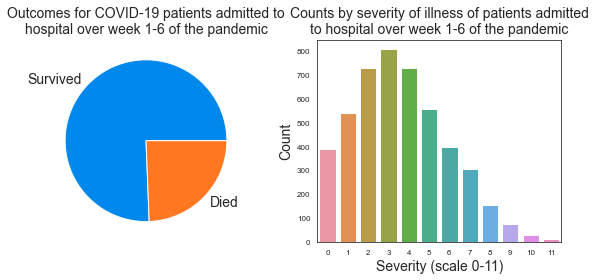

In [580]:
# Examining the 'targets'

deaths = mortality.Death.value_counts()
severity = pd.DataFrame(mortality.Severity.value_counts())
severity = severity.reset_index().sort_values('index')
fig, axes = plt.subplots(1,2, figsize=(8,4))

axes[0].pie(deaths, labels=['Survived','Died'], textprops={'fontsize': 14})
sns.barplot(x='index', y='Severity', hue=None, data=severity, order=None, hue_order=None, 
            color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, 
            dodge=True, ax=axes[1])
axes[0].set_title("\n".join(wrap("Outcomes for COVID-19 patients admitted to hospital over week 1-6 of the pandemic",50)), fontsize=14)
axes[1].set_title("\n".join(wrap("Counts by severity of illness of patients admitted to hospital over week 1-6 of the pandemic ",50)), fontsize=14)
axes[1].set_xlabel('Severity (scale 0-11)', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

In [581]:
mortality.Severity.describe()

count    4711.000000
mean        3.586287
std         2.289303
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        11.000000
Name: Severity, dtype: float64

## 1.2. Exploring General Features

### 1.2.1. Length of Stay in Hospital (LOS)

The majority of subjects (4370) stayed in hospital while a smaller number (341) were discharged on the same day.  The majority of hospital stays were for 1-14 days.  The longest hospital stay was 56 days. The majority of deaths occured early in the patients' tenure. However, for stays of long duration, the proportion of patients that died was very high.

In [467]:
# 'LOS_Y' = Did they stay in hospital? (Yes/No)
mortality['LOS_Y'].value_counts()

1    4370
0     341
Name: LOS_Y, dtype: int64

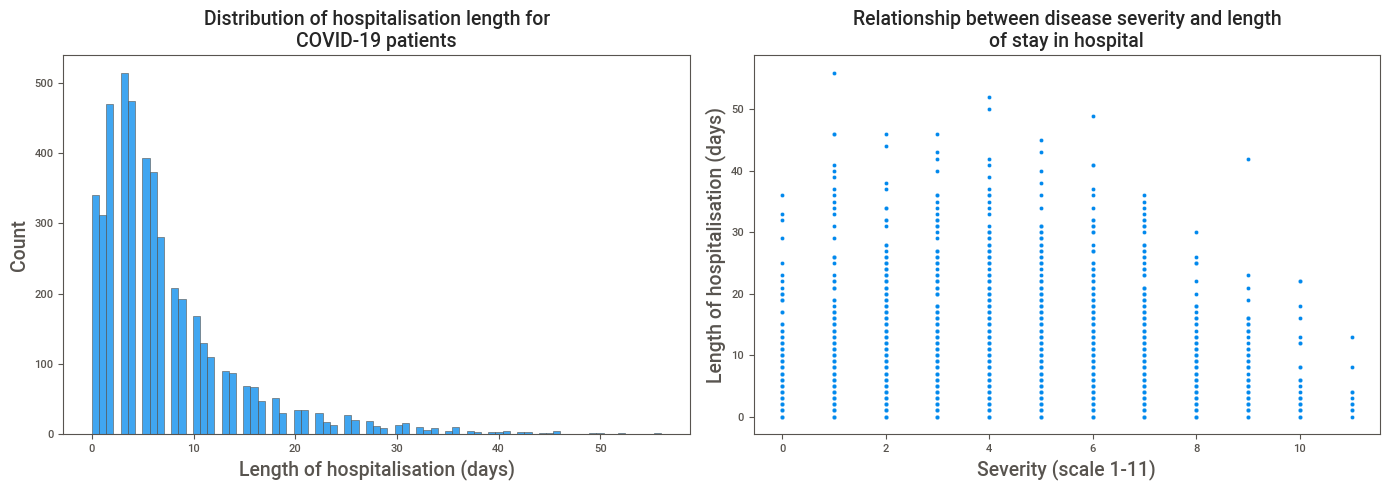

In [468]:
# Plotted distribution of length of stay in hospital and relationship between 
  # disease severity and length of hospital stay

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=mortality, x='LOS', ax=axes[0])
axes[0].set_title("\n".join(wrap("Distribution of hospitalisation length for COVID-19 patients",50)), fontsize=14)
axes[0].set_xlabel("Length of hospitalisation (days)", fontsize=14)
axes[0].set_ylabel("Count", fontsize=14)

sns.scatterplot(data=mortality, y='LOS', x='Severity', ax=axes[1])
axes[1].set_title("\n".join(wrap("Relationship between disease severity and length of stay in hospital",50)), fontsize=14)
axes[1].set_ylabel("Length of hospitalisation (days)", fontsize=14)
axes[1].set_xlabel("Severity (scale 1-11)", fontsize=14)

plt.tight_layout()
plt.show()

In [469]:
# Exploring the relationship between death and length of hospitalisation

LOS = pd.DataFrame(mortality[['LOS']].value_counts(), columns=['Count'])
deathLOS = mortality[['LOS','Death']].groupby('LOS').sum('Death')
LOS = LOS.join(deathLOS, on='LOS', how='left', sort=True)
LOS['%death'] = (LOS['Death']/LOS['Count'])*100
LOS.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')
LOS.head(3)

,LOS,Count,Death,%death
0,0,341,4,1.173021
1,1,312,100,32.051282
2,2,471,90,19.108280


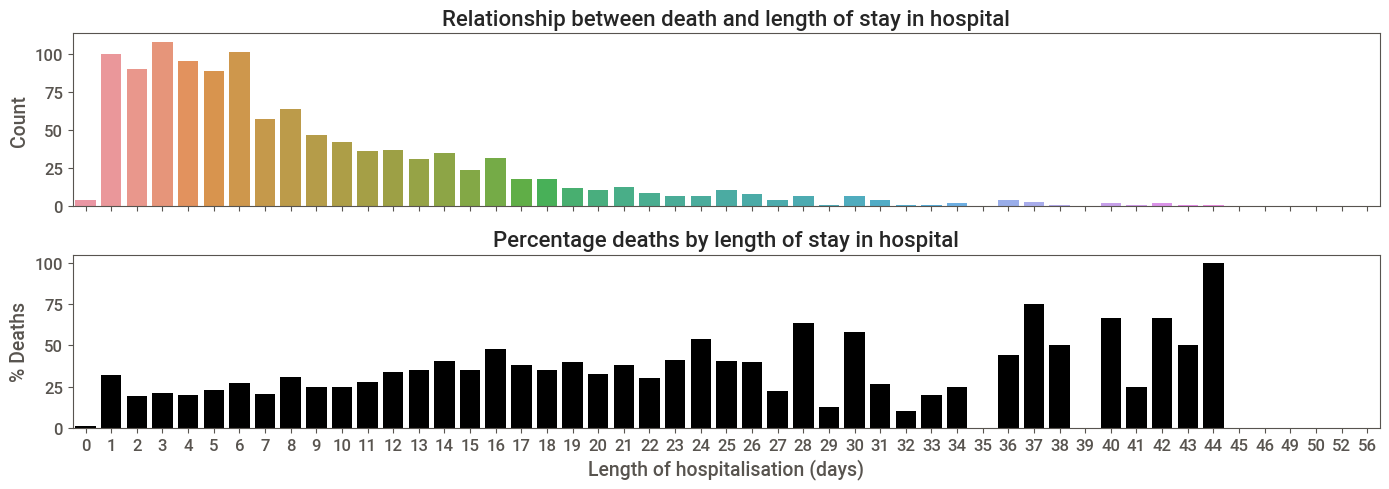

In [470]:
# Plotted proportion of survivors vs deaths over length of stay in hospital

fig, axes = plt.subplots(2, 1, figsize=(14, 5),sharex=True)

sns.barplot(x='LOS', y='Death', hue=None, data=LOS, order=None, hue_order=None, 
            color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, 
            dodge=True, ax=axes[0])
axes[0].set_title("\n".join(wrap("Relationship between death and length of stay in hospital",100)), fontsize=16)
axes[0].set_xlabel("")
axes[0].set_ylabel("Count", fontsize=14)
axes[0].tick_params(labelsize=12)

sns.barplot(x='LOS', y='%death', data=LOS, order=None, hue_order=None, color='k', palette=None, saturation=0.75, 
            errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=axes[1])
axes[1].set_title("\n".join(wrap("Percentage deaths by length of stay in hospital",100)), fontsize=16)
axes[1].set_xlabel("Length of hospitalisation (days)", fontsize=14)
axes[1].set_ylabel("% Deaths", fontsize=14)
axes[1].tick_params(labelsize=12)

plt.tight_layout()
plt.show()

#### 1.2.2. Severity of Illness ('Severity')

Severity was scored on a scale of 1-12.  How this scoring was done has not been made explicit. Severity appears to be normally distributed with a long tail at the high end of severity.  The majority of patients scored 3-5 for 'severity'. Of those that died, the majority of patients were scored 5-8 for severity. The proportion of deaths was greatest for those who scored in the 10-12 classes for severity, where >80% of individuals died.  

In [536]:
# Calculating total counts and death counts, proportions for each class of 'Severity'.

severity = pd.DataFrame(mortality[['Severity']].value_counts(), columns=['Count'])
deaths_by_severity = mortality[['Severity','Death']].groupby('Severity').sum('Death')
deaths_by_severity = severity.join(deaths_by_severity, on='Severity', how='left', sort=True)
deaths_by_severity['%Death'] = (deaths_by_severity['Death']/deaths_by_severity['Count'])*100
deaths_by_severity.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')
deaths_by_severity.head(6)

,Severity,Count,Death,%Death
0,0,390,5,1.282051
1,1,537,36,6.703911
2,2,729,69,9.465021
3,3,806,130,16.129032
4,4,728,184,25.274725
5,5,554,201,36.281588


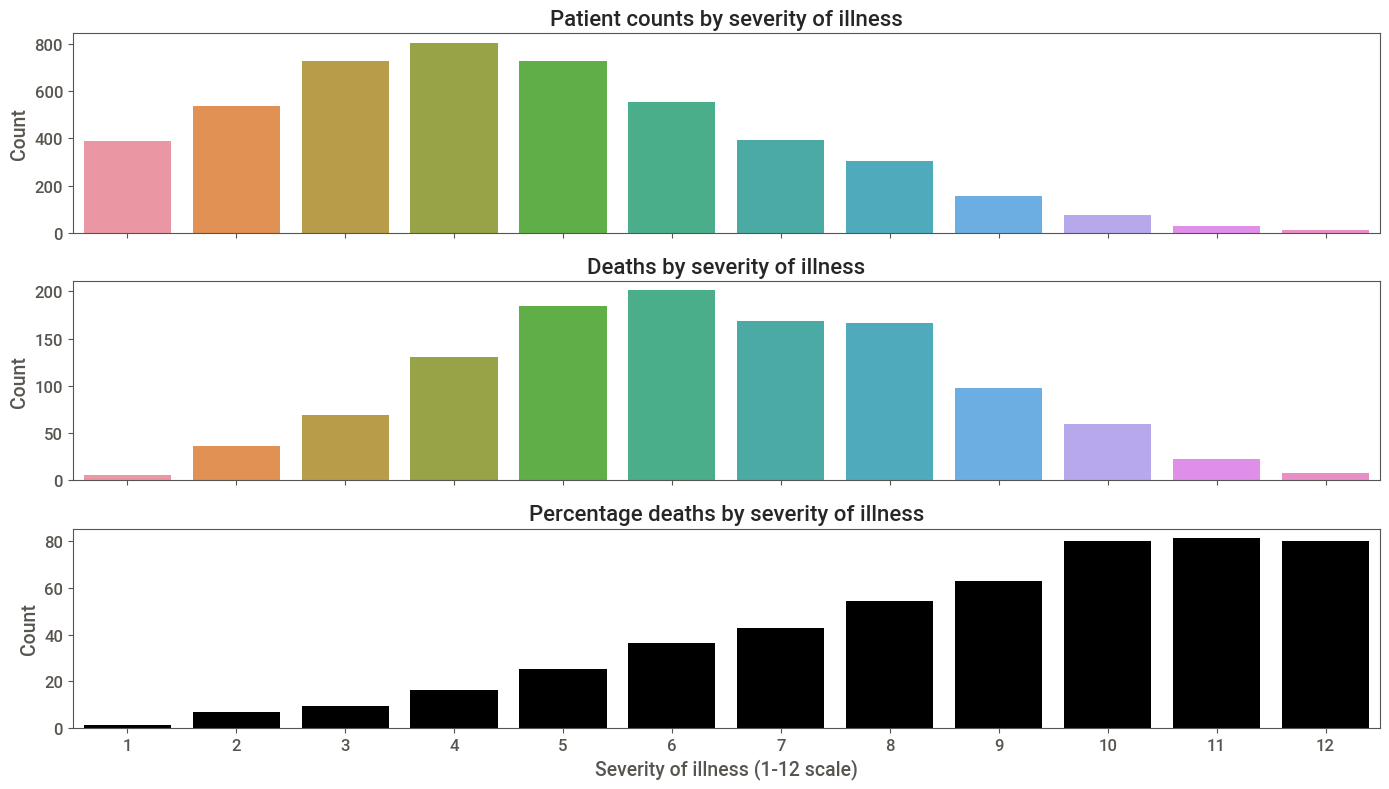

In [472]:
# Plotted proportion of deaths vs severity

fig, axes = plt.subplots(3, 1, figsize=(14, 8),sharex=True)
x = deaths_by_severity['Severity']+1

sns.barplot(x=x, y='Count', hue=None, data=deaths_by_severity, order=None, hue_order=None, 
            color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, 
            dodge=True, ax=axes[0])

axes[0].set_title("\n".join(wrap("Patient counts by severity of illness",100)), fontsize=16)
axes[0].set_xlabel("",fontsize=14)
axes[0].set_ylabel("Count", fontsize=14)
axes[0].tick_params(labelsize=12)

sns.barplot(x=x, y='Death', hue=None, data=deaths_by_severity, order=None, hue_order=None, 
            color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, 
            dodge=True, ax=axes[1])
axes[1].set_title("\n".join(wrap("Deaths by severity of illness",100)), fontsize=16)
axes[1].set_xlabel("",fontsize=14)
axes[1].set_ylabel("Count", fontsize=14)
axes[1].tick_params(labelsize=12)

sns.barplot(x=x, y='%Death', hue=None, data=deaths_by_severity, order=None, hue_order=None, 
            color='k', palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, 
            dodge=True, ax=axes[2])
axes[2].set_title("\n".join(wrap("Percentage deaths by severity of illness",100)), fontsize=16)
axes[2].set_xlabel("Severity of illness (1-12 scale)",fontsize=14)
axes[2].set_ylabel("Count", fontsize=14)
axes[2].tick_params(labelsize=12)

plt.tight_layout()
plt.show()

### 1.2.3. Ethnicity

The majority of hospital admissions were of 'Black' or 'Latino' ethnicity. The third largest class were of 'Other" ethnicity.  'Whie' and 'Asian" ethnicities made up the smallest proportion of admissions.  Surprisingly, a greater proportion of deaths occured among White and Asian patients (> 30% died) and were lower for Black, Latino and Other ethnicities (~ 20% died). A closer exploration of the relationship between age and ethnicity may explain this finding. 

In [473]:
# Replaced column names to get rid of spaces and unnecessary characters
mortality.rename(columns={'Age':'AgeGroup'}, inplace=True)
mortality.rename(columns={'Age.1':'Age'}, inplace=True)

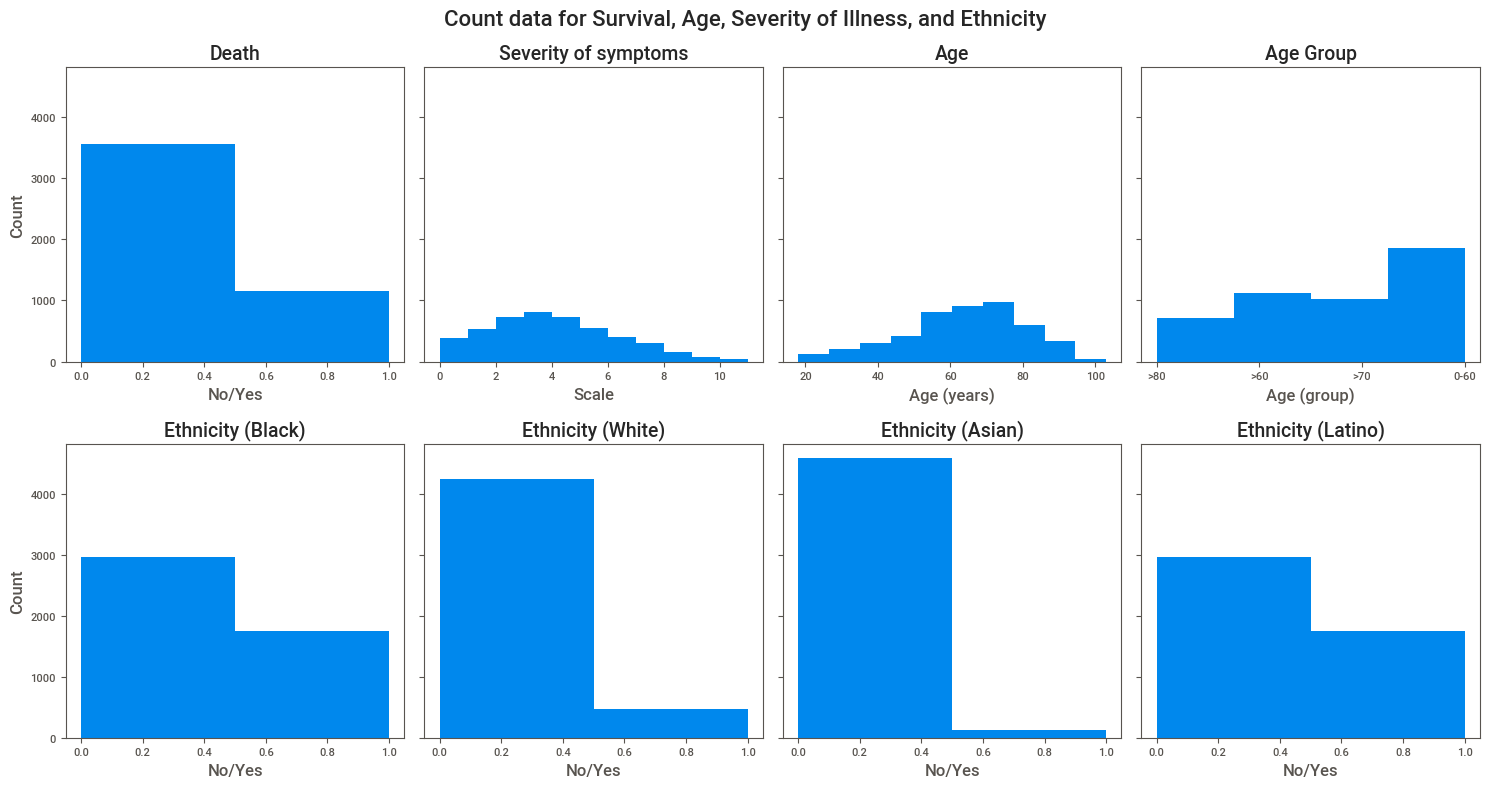

In [474]:
# Plotted distributions of data for Survival, Age, Severity of Illness, Ethnicity

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, sharey=True, figsize=(15,8))
fig.suptitle('Count data for Survival, Age, Severity of Illness, and Ethnicity', fontsize=16)
ax1.hist(mortality.Death, bins=2)
ax2.hist(mortality.Severity, bins=11)
ax3.hist(mortality.Age, bins=10)
ax4.hist(mortality.AgeGroup, bins=4)
ax5.hist(mortality.Black, bins=2)
ax6.hist(mortality.White, bins=2)
ax7.hist(mortality.Asian, bins=2)
ax8.hist(mortality.Latino, bins=2)
ax1.set_title("\n".join(wrap('Death',40)), fontsize=14)
ax2.set_title("\n".join(wrap('Severity of symptoms',40)), fontsize=14)
ax3.set_title("\n".join(wrap('Age',40)), fontsize=14)
ax4.set_title("\n".join(wrap('Age Group',40)), fontsize=14)
ax5.set_title("\n".join(wrap('Ethnicity (Black)',40)), fontsize=14)
ax6.set_title("\n".join(wrap('Ethnicity (White)',40)), fontsize=14)
ax7.set_title("\n".join(wrap('Ethnicity (Asian)',40)), fontsize=14)
ax8.set_title("\n".join(wrap('Ethnicity (Latino)',40)), fontsize=14)   

ax1.set_xlabel("No/Yes", fontsize=12)
ax2.set_xlabel("Scale", fontsize=12)
ax3.set_xlabel("Age (years)", fontsize=12)
ax4.set_xlabel("Age (group)", fontsize=12)
ax5.set_xlabel("No/Yes", fontsize=12)
ax6.set_xlabel("No/Yes", fontsize=12)
ax7.set_xlabel("No/Yes", fontsize=12)
ax8.set_xlabel("No/Yes", fontsize=12)  

ax1.set_ylabel("Count", fontsize=12)
ax5.set_ylabel("Count", fontsize=12)

fig.tight_layout()
plt.show()

In [530]:
# Looking at hospitalisations and deaths by ethnicity
  # Had to recreate a single catagorical column from the dummy variables


#ethnicity = mortality[['Black','White','Asian','Latino','Death']]
#ethnicity['Other'] = np.where((ethnicity['Black'] == 0)&(ethnicity['White'] == 0)&(ethnicity['Asian'] == 0)&(ethnicity['Latino'] == 0), 1, 0)
#ethnicity['Ethnicity'] = np.where(ethnicity['Black'] == 1, "Black", 0)
#ethnicity['Ethnicity'] = np.where((ethnicity['White'] == 1), "White", ethnicity['Ethnicity'])
#ethnicity['Ethnicity'] = np.where(ethnicity['Asian'] == 1, "Asian", ethnicity['Ethnicity'])
#ethnicity['Ethnicity'] = np.where(ethnicity['Latino'] == 1, "Latino", ethnicity['Ethnicity'])
#ethnicity['Ethnicity'] = np.where(ethnicity['Other'] == 1, "Other", ethnicity['Ethnicity'])

#death_by_ethnicity = pd.DataFrame(ethnicity[['Ethnicity']].value_counts(), columns=['Count']) 
#ethnicity = ethnicity[['Ethnicity','Death']].groupby('Ethnicity').sum('Death')
#ethnicity.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')


#ethnicity = ethnicity.merge(death_by_ethnicity, on='Ethnicity', how='left')
#ethnicity = ethnicity.drop("Count_x", axis=1)
#ethnicity['%death'] = (ethnicity['Death']/ethnicity['Count_y'])*100
#ethnicity = ethnicity.rename(columns={"Count_y": "Count"})
ethnicity

,Ethnicity,Death,Count,%death
0,Asian,38,119,31.932773
1,Black,402,1693,23.744832
2,Latino,405,1753,23.103252
3,Other,178,761,23.390276
4,White,125,385,32.467532


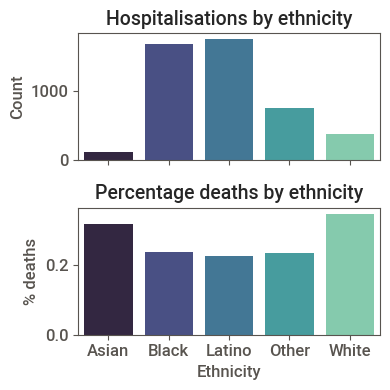

In [531]:
# Plotted deaths by ethnicity

fig, axes = plt.subplots(2, 1, figsize=(4, 4),sharex=True)
labels=['Asian','Black','Latino','Other','White']

sns.barplot(x='Ethnicity', y='Counts', data=deaths_by_ethnicity, palette='mako', ax=axes[0])
sns.barplot(x='Ethnicity', y='%death', data=deaths_by_ethnicity, palette='mako', ax=axes[1])

axes[0].set_title("\n".join(wrap("Hospitalisations by ethnicity",100)), fontsize=14)
axes[0].set_xlabel("",fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].tick_params(labelsize=12)

axes[1].set_title("\n".join(wrap("Percentage deaths by ethnicity",100)), fontsize=14)
axes[1].set_xlabel("Ethnicity",fontsize=12)
axes[1].set_ylabel("% deaths", fontsize=12)
axes[1].tick_params(labelsize=12)

plt.tight_layout()
plt.show()

### 1.2.4. Age

The majority of hospital admissions were over the age of 50.  The oldest patient was 103 and the youngest 18. The proportion of deaths increased with age. ~ 50% of patients in their 90s died. 

In [532]:
# Calculating total counts and death counts, proportions for each age.
age = pd.DataFrame(mortality[['Age']].value_counts(), columns=['Count'])
death_by_age = mortality[['Age','Death']].groupby('Age').sum('Death')
age = age.join(death_by_age, on='Age', how='left', sort=True)
age['%death'] = (age['Death']/age['Count'])*100
age.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')
age.head(3)

,Age,Count,Death,%death
0,18,5,1,20.0
1,19,10,0,0.0
2,20,11,0,0.0


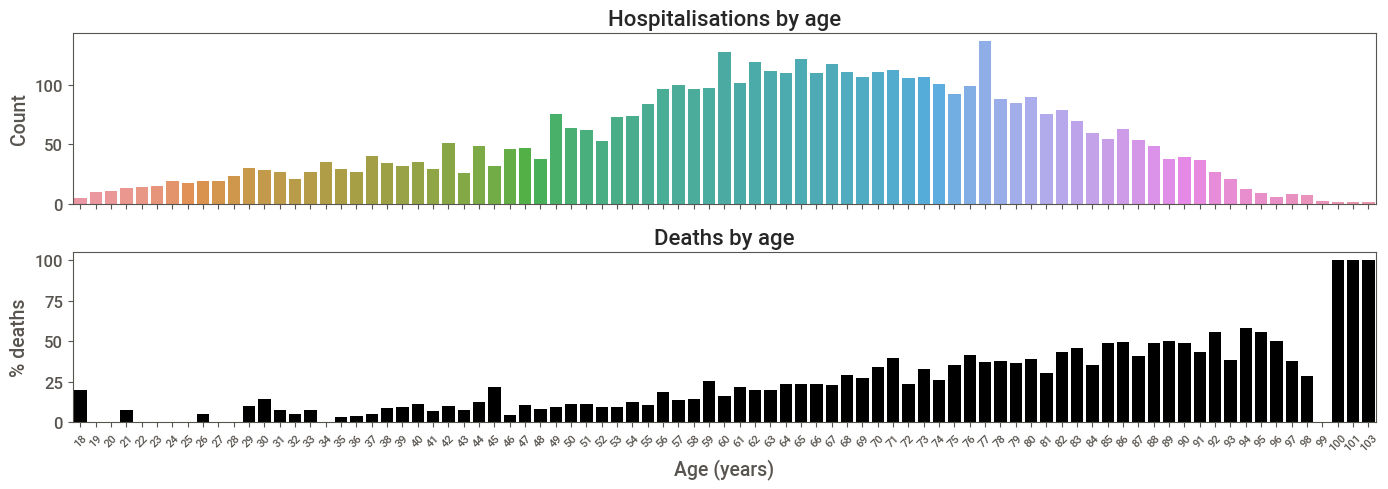

In [535]:
# Plotted hospitalisations and % death by age

fig, axes = plt.subplots(2, 1, figsize=(14, 5),sharex=True)

sns.barplot(x='Age', y='Count', hue=None, data=age, order=None, hue_order=None, 
            color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, 
            dodge=True, ax=axes[0])

sns.barplot(x='Age', y='%death', hue=None, data=age, order=None, hue_order=None, 
            color='k', palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, 
            dodge=True, ax=axes[1])

axes[0].set_title("\n".join(wrap("Hospitalisations by age",100)), fontsize=16)
axes[0].set_xlabel("",fontsize=14)
axes[0].set_ylabel("Count", fontsize=14)
axes[0].tick_params(axis='x', labelsize=8, rotation=45)
axes[0].tick_params(axis='y', labelsize=12)

axes[1].set_title("\n".join(wrap("Deaths by age",100)), fontsize=16)
axes[1].set_xlabel("Age (years)",fontsize=14)
axes[1].set_ylabel("% deaths", fontsize=14)
axes[1].tick_params(axis='x', labelsize=8, rotation=45)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

## 1.3. Patient Medical Histories

This next section looks at comorbidities.  These were scored mostly as binary 'Yes/No' for a history of each comorbidity. 

In [17]:
# The PVD feature has 0,1,2 categories, but it isn't clear what '2' means
mortality.PVD.value_counts()

0    3863
1     813
2      35
Name: PVD, dtype: int64

In [18]:
# Will create a new PVD feature with the '2' category converted to '1'
mortality['PVDcompressed'] = np.where(mortality['PVD'] == 2, 1, mortality['PVD'])
#mortality[['PVD','PVDcompressed']]

In [19]:
# Replaced column names to get rid of spaces and unnecessary characters
mortality.rename(columns={'DM Complicated':'DMcompl'}, inplace=True)
mortality.rename(columns={'DM Simple':'DMsimple'}, inplace=True)
mortality.rename(columns={'Renal Disease':'RenalDis'}, inplace=True)
mortality.rename(columns={'All CNS':'AllCNS'}, inplace=True)
mortality.rename(columns={'Pure CNS':'PureCNS'}, inplace=True)

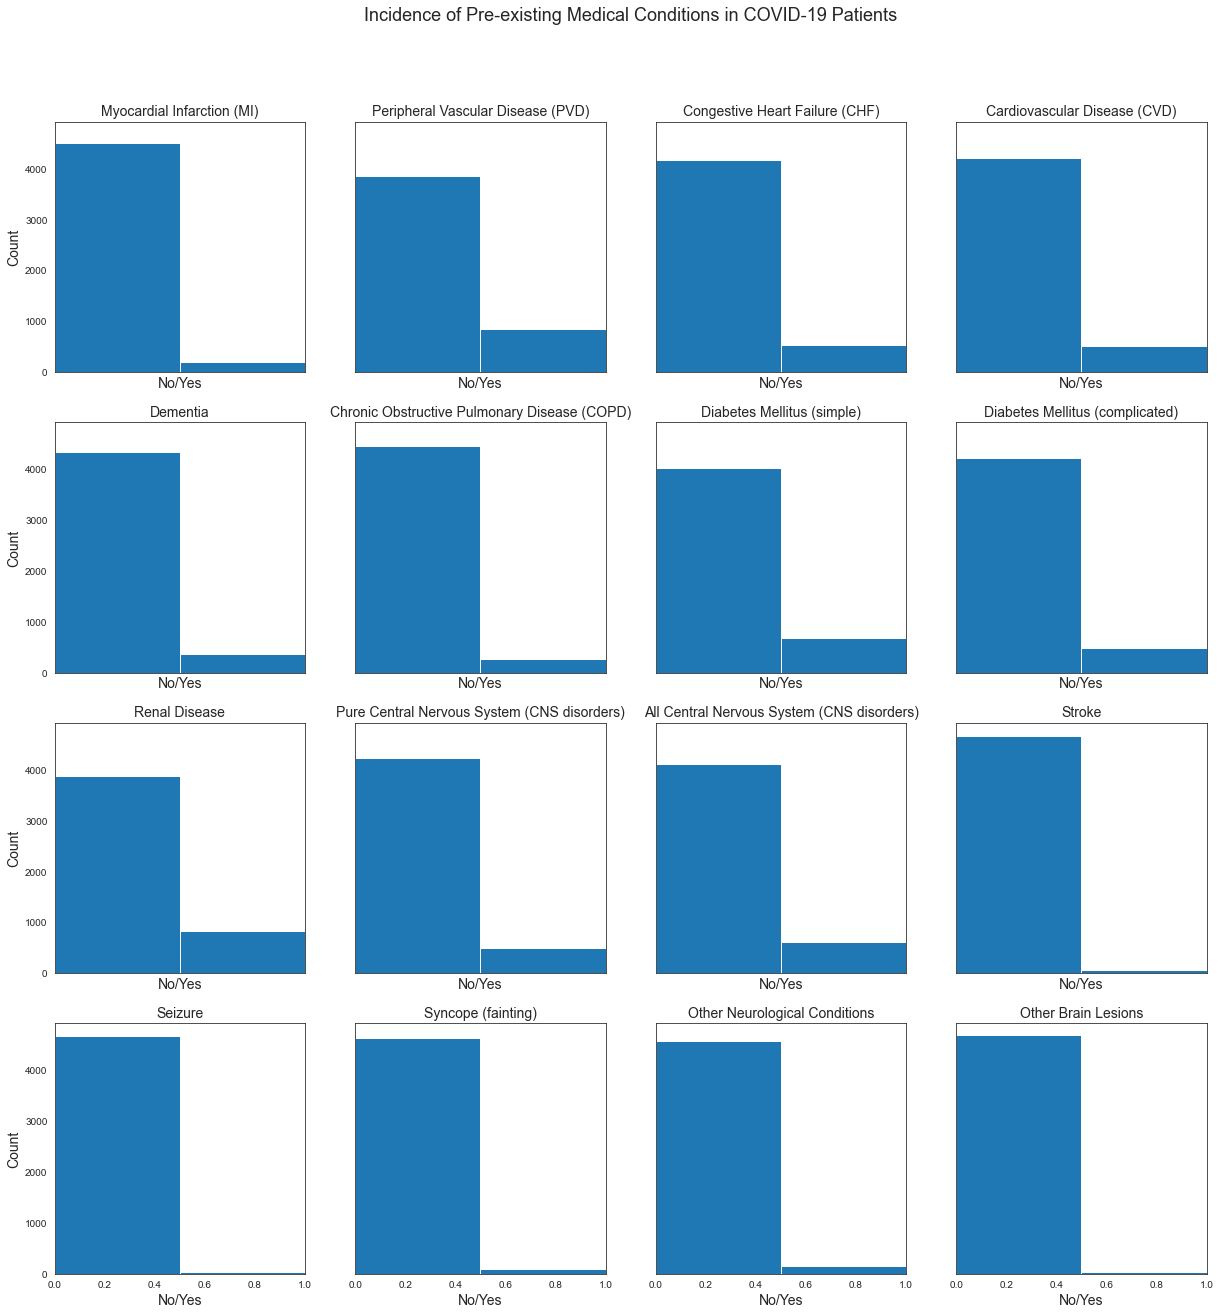

In [20]:
# Plotted distributions of data for comorbidities

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12),
      (ax13, ax14, ax15, ax16)) = plt.subplots(4, 4, sharey=True, sharex=True, figsize=(20,20))
fig.suptitle('Incidence of Pre-existing Medical Conditions in COVID-19 Patients', fontsize=18)
ax1.hist(mortality.MI, bins=2)
ax2.hist(mortality.PVDcompressed, bins=2)
ax3.hist(mortality.CHF, bins=2)
ax4.hist(mortality.CVD, bins=2)
ax5.hist(mortality.DEMENT, bins=2)
ax6.hist(mortality.COPD, bins=2)
ax7.hist(mortality.DMsimple, bins=2)
ax8.hist(mortality.DMcompl, bins=2)
ax9.hist(mortality.RenalDis, bins=2)
ax10.hist(mortality.PureCNS, bins=2)
ax11.hist(mortality.AllCNS, bins=2)
ax12.hist(mortality.Stroke, bins=2)
ax13.hist(mortality.Seizure, bins=2)
ax14.hist(mortality.OldSyncope, bins=2)
ax15.hist(mortality.OldOtherNeuro, bins=2)
ax16.hist(mortality.OtherBrnLsn, bins=2)

ax1.set_title("\n".join(wrap('Myocardial Infarction (MI)',40)), fontsize=14)
ax2.set_title("\n".join(wrap('Peripheral Vascular Disease (PVD)',40)), fontsize=14)
ax3.set_title("\n".join(wrap('Congestive Heart Failure (CHF)',40)), fontsize=14)
ax4.set_title("\n".join(wrap('Cardiovascular Disease (CVD)',40)), fontsize=14)
ax5.set_title("\n".join(wrap('Dementia',40)), fontsize=14)
ax6.set_title("\n".join(wrap('Chronic Obstructive Pulmonary Disease (COPD)',50)), fontsize=14)
ax7.set_title("\n".join(wrap('Diabetes Mellitus (simple)',40)), fontsize=14)
ax8.set_title("\n".join(wrap('Diabetes Mellitus (complicated)',40)), fontsize=14)
ax9.set_title("\n".join(wrap('Renal Disease',40)), fontsize=14)
ax10.set_title("\n".join(wrap('Pure Central Nervous System (CNS disorders)',50)), fontsize=14)
ax11.set_title("\n".join(wrap('All Central Nervous System (CNS disorders)',50)), fontsize=14)
ax12.set_title("\n".join(wrap('Stroke',40)), fontsize=14)
ax13.set_title("\n".join(wrap('Seizure',40)), fontsize=14)
ax14.set_title("\n".join(wrap('Syncope (fainting)',40)), fontsize=14)
ax15.set_title("\n".join(wrap('Other Neurological Conditions',40)), fontsize=14)
ax16.set_title("\n".join(wrap('Other Brain Lesions',40)), fontsize=14)  

ax1.set_xlabel("No/Yes", fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=14)
ax4.set_xlabel("No/Yes", fontsize=14)
ax5.set_xlabel("No/Yes", fontsize=14)
ax6.set_xlabel("No/Yes", fontsize=14)
ax7.set_xlabel("No/Yes", fontsize=14)
ax8.set_xlabel("No/Yes", fontsize=14)
ax9.set_xlabel("No/Yes", fontsize=14)
ax10.set_xlabel("No/Yes", fontsize=14)
ax11.set_xlabel("No/Yes", fontsize=14)
ax12.set_xlabel("No/Yes", fontsize=14)
ax13.set_xlabel("No/Yes", fontsize=14)
ax14.set_xlabel("No/Yes", fontsize=14)
ax15.set_xlabel("No/Yes", fontsize=14)
ax16.set_xlabel("No/Yes", fontsize=14)

ax13.set_xlim(0,1)
ax14.set_xlim(0,1)
ax15.set_xlim(0,1)
ax16.set_xlim(0,1)

ax1.set_ylabel("Count", fontsize=14)
ax5.set_ylabel("Count", fontsize=14)
ax9.set_ylabel("Count", fontsize=14)
ax13.set_ylabel("Count", fontsize=14)

fig.tight_layout()
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
plt.show()

## 1.4. Data Cleaning - Blood test data

Anomalies were found in these features, where the 'Was the test done?' column did not always match the presence or absences of floats or scores in the other columns.  Corrections have been made based on the assumption that data in the initial column of floats or integers is correct, and that '0' values always indicate 'test not done'.  0 values were replaced with median or mode values (as appropriate) imputed from the cohort. 

### 1.4.1. Blood Urea Nitrogen (BUN)

A blood urea nitrogen (BUN) test measures the amount of urea nitrogen found in the blood. Urea nitrogen is a waste product made when the liver breaks down protein. It's carried in the blood, filtered out by the kidneys, and removed from the body in urine. If the liver isn't healthy, it may not break down proteins the way it should. If the kidneys aren't healthy, they may not properly filter urea. Either of these problems can lead to changes in the amount of urea nitrogen in the body.

reference: https://www.urmc.rochester.edu/encyclopedia/content.aspx?contenttypeid=167&contentid=urea_nitrogen_serum

In [21]:
# Replaced column names to get rid of white space
mortality.rename(columns={'BUN > 30':'BUN>30'}, inplace=True)

In [22]:
mortality[['BUN']].describe()

,BUN
count,4711.000000
mean,27.196555
std,31.215784
min,0.000000
25%,10.000000
50%,17.000000
75%,33.000000
max,301.000000


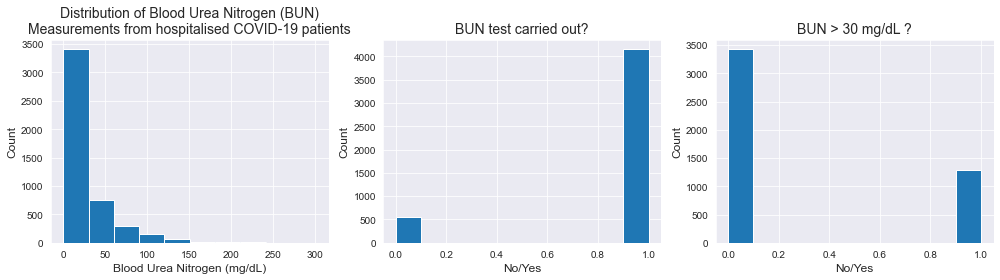

In [23]:
# Plotted distributions of data for 'BUN' (blood urea nitrogen, in mg/dL)

sns.set_style("darkgrid", {'axes.grid' : True})
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))

ax1.hist(mortality.BUN)
ax1.set_title("\n".join(wrap('Distribution of Blood Urea Nitrogen (BUN) Measurements from hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Blood Urea Nitrogen (mg/dL)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality.BUNYes)
ax2.set_title("\n".join(wrap('BUN test carried out?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['BUN>30'])
ax3.set_title("\n".join(wrap('BUN > 30 mg/dL ?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

plt.show()

In [24]:
# There are individuals with high values for 'BUN' that are scored as '0' for 'BUNYes' and 0 for 'BUN > 30'
missingBUN = mortality[mortality['BUNYes'] == 0]
missingBUN = missingBUN[['BUN','BUNYes','BUN>30']].sort_values(by='BUN', ascending=False)
missingBUN

,BUN,BUNYes,BUN>30
3996,137.0,0,0
4127,112.0,0,0
4183,98.0,0,0
3844,89.0,0,0
3941,89.0,0,0
...,...,...,...
1504,0.0,0,0
1499,0.0,0,0
1494,0.0,0,0
1491,0.0,0,0


In [25]:
# There are 83 instances where 'BUNYes' is recorded as '0' but a value is present in the 'BUN' column
BUNanomalies = missingBUN[missingBUN['BUN'] != 0]
BUNanomalies

,BUN,BUNYes,BUN>30
3996,137.000,0,0
4127,112.000,0,0
4183,98.000,0,0
3844,89.000,0,0
3941,89.000,0,0
...,...,...,...
4013,6.000,0,0
4271,6.000,0,0
4063,6.000,0,0
4112,4.999,0,0


In [26]:
# There are 18 instances where 'BUN' is > 30 but is scored as '0' in the 'BUN > 30' column
BUNanomalies[BUNanomalies['BUN'] > 30]

,BUN,BUNYes,BUN>30
3996,137.0,0,0
4127,112.0,0,0
4183,98.0,0,0
3844,89.0,0,0
3941,89.0,0,0
3850,83.0,0,0
4483,83.0,0,0
3970,82.0,0,0
4033,79.0,0,0
3930,55.0,0,0


Best strategy will be to delete and recreate the 'BUNYes' and 'BUN > 30' columns

In [27]:
mortality = mortality.drop(['BUNYes','BUN>30'], axis=1)
#mortality.columns

In [28]:
# Recreated the 'BUNYes' and 'BUN>30' columns
  # code reference: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
mortality['BUNYes'] = np.where(mortality['BUN'] == 0, 0, 1)
mortality['BUN>30'] = np.where(mortality['BUN'] > 30, 1, 0)

# Created an additional category - 'BUN>100'
mortality['BUN>100'] = np.where(mortality['BUN'] > 100, 1, 0)
mortality[['BUN','BUNYes','BUN>30','BUN>100']]

,BUN,BUNYes,BUN>30,BUN>100
0,16.0,1,0,0
1,206.0,1,1,1
2,85.0,1,1,0
3,0.0,0,0,0
4,0.0,0,0,0
...,...,...,...,...
4706,8.0,1,0,0
4707,13.0,1,0,0
4708,7.0,1,0,0
4709,17.0,1,0,0


In [29]:
# How many '0' instances are there for 'BUN'?
zeroBUN = mortality[mortality['BUN'] == 0]
notzeroBUN = mortality[mortality['BUN'] != 0]

# There are 605 of these entries
zeroBUN['BUN']

# Replaced '0' with median value for BUN
medianBUN = np.median(notzeroBUN['BUN'])
print("Median value for BUN = ", medianBUN)
mortality['BUN'] = mortality['BUN'].replace(0, medianBUN) 

Median value for BUN =  19.0


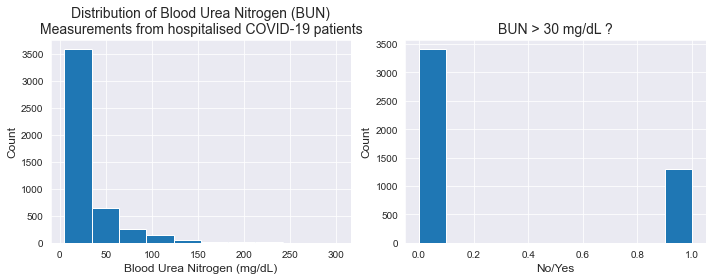

In [30]:
# New Plot

sns.set_style("darkgrid", {'axes.grid' : True})
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.hist(mortality.BUN)
ax1.set_title("\n".join(wrap('Distribution of Blood Urea Nitrogen (BUN) Measurements from hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Blood Urea Nitrogen (mg/dL)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality['BUN>30'])
ax2.set_title("\n".join(wrap('BUN > 30 mg/dL ?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

The majority of patients had BUN values under 20 mg/dL, in the normal range, indicating an absence of kidney disease.  Roughly a third of patients had BUN values over 30 mg/dL, potentially indicating kidney issues. 

### 1.4.2. Oxygen saturation 

Oxygen saturation is the measure of how much oxygen is traveling through the body in the red blood cells. Normal oxygen saturation for healthy adults is usually between 95% and 100%.

In [31]:
# Replaced column names to get rid of white space and unnecessary characters
mortality.rename(columns={'O2 Sat < 94':'O2Sat<94'}, inplace=True)
mortality.rename(columns={'OsSats':'O2Sat'}, inplace=True)
mortality.rename(columns={'O2SatsYes':'O2SatYes'}, inplace=True)

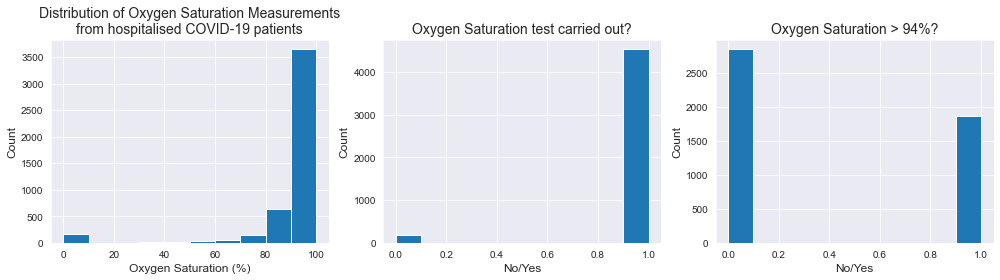

In [32]:
# Plotted distributions of data for 'O2Sat' (oxygen saturation)

sns.set_style("darkgrid", {'axes.grid' : True})
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))

ax1.hist(mortality.O2Sat)
ax1.set_title("\n".join(wrap('Distribution of Oxygen Saturation Measurements from hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Oxygen Saturation (%)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality.O2SatYes)
ax2.set_title("\n".join(wrap('Oxygen Saturation test carried out?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['O2Sat<94'])
ax3.set_title("\n".join(wrap('Oxygen Saturation > 94%?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [33]:
# Are there are individuals with high values for 'O2Sat' that are scored as '0' for 'O2SatYes' and 0 for 'O2Sat<94' ?
missingO2Sat = mortality[mortality['O2SatYes'] == 0]
missingO2Sat = missingO2Sat[['O2Sat','O2SatYes','O2Sat<94']].sort_values(by='O2Sat', ascending=True)
missingO2Sat[['O2Sat','O2SatYes','O2Sat<94']]

,O2Sat,O2SatYes,O2Sat<94
2228,0,0,1
2580,0,0,1
2574,0,0,1
2519,0,0,1
2493,0,0,1
...,...,...,...
3941,100,0,0
4506,100,0,0
3932,100,0,0
3891,100,0,0


In [35]:
# There are 47 instances where 'O2SatsYes' is recorded as '0' 
   # but a value is present in the 'OsSats' column
O2Satsanomalies = missingO2Sat[missingO2Sat['O2Sat'] != 0]
O2Satsanomalies[['O2Sat','O2SatYes','O2Sat<94']]

,O2Sat,O2SatYes,O2Sat<94
4487,60,0,1
4250,77,0,1
3866,80,0,1
4579,81,0,1
4618,81,0,1
3949,85,0,1
4031,86,0,1
3953,87,0,1
3895,91,0,1
4707,91,0,1


In [37]:
# The 'O2 Sat < 94' scoring is probably correct, but cases where O2Sat=0 are most 
  # likely because O2Sat was not measured
     # These should have values imputed from the median and not be scored as '1' for 'O2Sat<94' 
missingO2Sat[missingO2Sat['O2Sat'] < 94].sort_values('O2Sat<94', ascending=False)

,O2Sat,O2SatYes,O2Sat<94
2228,0,0,1
2580,0,0,1
145,0,0,1
141,0,0,1
118,0,0,1
...,...,...,...
1989,0,0,1
3359,0,0,1
3290,0,0,1
3277,0,0,1


In [38]:
# Dropped the 'O2SatYes' and 'O2Sat< 94' columns 
mortality = mortality.drop(['O2SatYes','O2Sat<94'], axis=1)
#mortality.columns

In [39]:
# Recreated the 'O2SatYes' column
mortality['O2SatYes'] = np.where(mortality['O2Sat'] == 0, 0, 1)

In [40]:
# Calcuated the mode, median and mean temperature
    
vals,counts = np.unique(mortality['O2Sat'], return_counts=True)
index = np.argmax(counts)
print("Mode = ", vals[index])
print("Median = ", np.median(mortality['O2Sat']))
print("Mean = ", np.mean(mortality['O2Sat']))

# Repaced 0 values with the mode value for oxygen saturation
mortality['O2Sat'] = mortality['O2Sat'].replace(0, vals[index]) 

Mode =  100
Median =  95.0
Mean =  89.59371683294417


In [41]:
# Recreated the 'O2Sat<94' column; created new feature 'O2Sat<90'

mortality['O2Sat<94'] = np.where(mortality['O2Sat'] < 94, 1, 0)
mortality['O2Sat<90'] = np.where(mortality['O2Sat'] < 90, 1, 0)
mortality[['O2Sat','O2SatYes','O2Sat<94','O2Sat<90']].head()

,O2Sat,O2SatYes,O2Sat<94,O2Sat<90
0,95,1,0,0
1,89,1,1,1
2,99,1,0,0
3,86,1,1,1
4,93,1,1,0


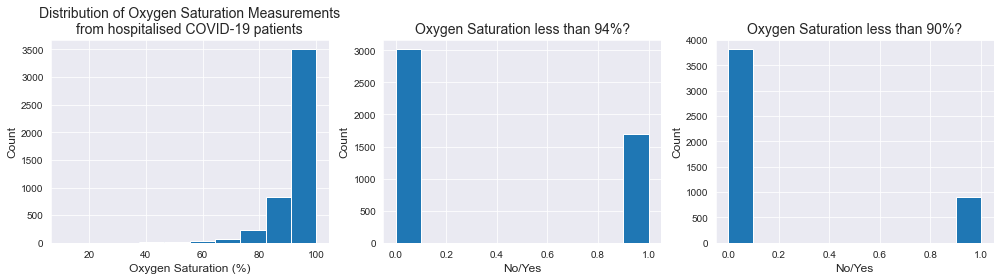

In [42]:
# New Plots for 'O2Sat' (oxygen saturation)

sns.set_style("darkgrid", {'axes.grid' : True})
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))

ax1.hist(mortality.O2Sat)
ax1.set_title("\n".join(wrap('Distribution of Oxygen Saturation Measurements from hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Oxygen Saturation (%)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality['O2Sat<94'])
ax2.set_title("\n".join(wrap('Oxygen Saturation less than 94%?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['O2Sat<90'])
ax3.set_title("\n".join(wrap('Oxygen Saturation less than 90%?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

Approximately half of patients had normal oxygen saturation measures of 100% or close to 100%. However, just over 50% of patients had oxygen saturation values below 94% and approximately 20% of patients had oxygen saturation values below 90%, potentially indicating abnormally low oxygenation of the blood and therefore lower than ideal oxygen supply to the organs and tissues.  

### 1.4.3. Temperature

The average body temperature is 37 degreesC. But normal body temperature can range between 36.1 C and 37.2 C or more. Body temperature can vary depending on how active an individual is, or the time of day. Generally, older people have lower body temperatures than younger people.

In [43]:
# Replaced column names to get rid of white space and unnecessary characters
mortality.rename(columns={'Temp > 38':'Temp>38'}, inplace=True)

In [44]:
mortality[['Temp']].describe()

,Temp
count,4711.000000
mean,35.811932
std,7.739430
min,-17.780000
25%,36.720000
50%,37.110000
75%,37.720000
max,50.000000


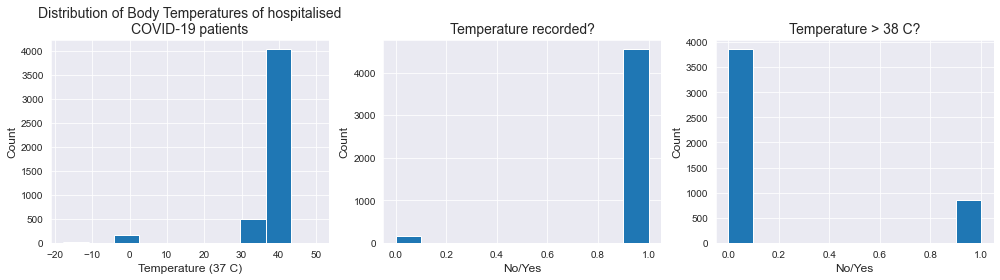

In [45]:
# Plotted distributions of data for temperature

sns.set_style("darkgrid", {'axes.grid' : True})
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))

ax1.hist(mortality.Temp)
ax1.set_title("\n".join(wrap('Distribution of Body Temperatures of hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Temperature (37 C)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality.TempYes)
ax2.set_title("\n".join(wrap('Temperature recorded?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['Temp>38'])
ax3.set_title("\n".join(wrap('Temperature > 38 C?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

People can't have a temperature of 0. The '0's will need to be replaced with the median or the mode temperature, as will the entry with the value of <-10!

In [46]:
# Some individuals have a recorded temperature of -17.78, 
  # which is impossible unless they were dead in the morgue. 

lowtemps = mortality[mortality['Temp'] < 0]
lowtemps['Temp'].head()

79     -17.78
189    -17.78
336    -17.78
886    -17.78
1004   -17.78
Name: Temp, dtype: float64

In [47]:
# Do the values in the 'Temp' column align with what's recorded in the 'TempYes' and 'Temp > 38' columns?
temp = mortality[mortality['Temp'] == 0]
# 38 entries are recorded as having having had their temperature taken, but a temperature of '0' was recorded.
  # These need to be converted to '0' in the 'TempYes' column
temp = mortality[(mortality['Temp'] == 0)&(mortality['TempYes'] == 1)]
# None are incorrectly recorded in the 'Temp > 38' column
temp2 = mortality[(mortality['Temp'] <= 38)&(mortality['Temp>38'] == 1)]

temp[['Temp','TempYes','Temp>38']]

,Temp,TempYes,Temp>38
110,0.0,1,0
1109,0.0,1,0
1542,0.0,1,0
1813,0.0,1,0
3849,0.0,1,0
3890,0.0,1,0
3894,0.0,1,0
3930,0.0,1,0
3931,0.0,1,0
3948,0.0,1,0


In [48]:
# Dropped the 'TempYes' column 
mortality = mortality.drop(['TempYes'], axis=1)
#mortality.columns

In [49]:
# Recreated the 'TempYes' column
mortality['TempYes'] = np.where(mortality['Temp'] != 0, 1, 0)
mortality[['Temp','TempYes','Temp>38']].head()

,Temp,TempYes,Temp>38
0,36.89,1,0
1,36.33,1,0
2,39.22,1,1
3,38.89,1,1
4,38.06,1,1


In [50]:
# Created new features: 'Temp<=36', 'Temp>39'
mortality['Temp<=36'] = np.where(mortality['Temp'] <= 36, 1, 0)
mortality['Temp>39'] = np.where(mortality['Temp'] > 39, 1, 0)
mortality[['Temp','TempYes','Temp>38','Temp>39','Temp<=36']].head()

,Temp,TempYes,Temp>38,Temp>39,Temp<=36
0,36.89,1,0,0,0
1,36.33,1,0,0,0
2,39.22,1,1,1,0
3,38.89,1,1,0,0
4,38.06,1,1,0,0


In [51]:
mortality.value_counts('Temp>39')

Temp>39
0    4422
1     289
dtype: int64

In [52]:
mortality.value_counts('Temp<=36')

Temp<=36
0    4412
1     299
dtype: int64

In [53]:
# Calcuated the mode, median and mean temperature
    
vals,counts = np.unique(mortality['Temp'], return_counts=True)
index = np.argmax(counts)
print("Mode = ", vals[index])
print("Median = ", np.median(mortality['Temp']))
print("Mean = ", np.mean(mortality['Temp']))

# Repaced 0 (and <0) values with the mode value for temperature
mortality['Temp'] = mortality['Temp'].replace(0, vals[index])
mortality['Temp'] = mortality['Temp'].replace(-17.78, vals[index]) 

Mode =  36.89
Median =  37.11
Mean =  35.811931649331406


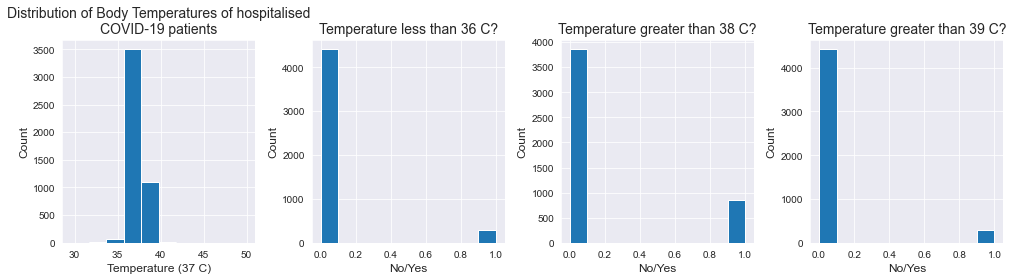

In [54]:
# New Plots - Temperature

sns.set_style("darkgrid", {'axes.grid' : True})
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(14,4))

ax1.hist(mortality.Temp)
ax1.set_title("\n".join(wrap('Distribution of Body Temperatures of hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Temperature (37 C)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality['Temp<=36'])
ax2.set_title("\n".join(wrap('Temperature less than 36 C?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['Temp>38'])
ax3.set_title("\n".join(wrap('Temperature greater than 38 C?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

ax4.hist(mortality['Temp>39'])
ax4.set_title("\n".join(wrap('Temperature greater than 39 C?',50)), fontsize=14)
ax4.set_xlabel("No/Yes", fontsize=12)
ax4.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

Most patients had normal body temperature.  A very small cohort had temperatures under 36 degrees, and a larger cohort (approx. 20%) had temperatures over 38 degrees. Temperatures over 39 degrees were rare. 

### 1.4.4. Mean Arterial Pressure

In general, most people need a MAP of at least 60 mm Hg (millimeters of mercury) or greater to ensure enough blood flow to vital organs, such as the heart, brain, and kidneys. Doctors usually consider anything between 70 and 100 mm Hg to be normal.

Reference: https://www.healthline.com/health/mean-arterial-pressure#:~:text=What%20is%20a%20normal%20MAP,mm%20Hg%20to%20be%20normal.

In [55]:
# Renamed the 'MAP < 70' column to remove spaces
mortality.rename(columns={'MAP < 70':'MAP<70'}, inplace=True)
mortality.rename(columns={'MapYes':'MAPYes'}, inplace=True)
mortality[['MAP','MAPYes','MAP<70']].head()

,MAP,MAPYes,MAP<70
0,102.67,1,0
1,86.00,1,0
2,67.33,1,0
3,102.67,1,0
4,104.33,1,0


In [56]:
mortality[['MAP']].describe()

,MAP
count,4711.000000
mean,81.747398
std,24.490385
min,0.000000
25%,75.835000
50%,86.670000
75%,96.000000
max,138.330000


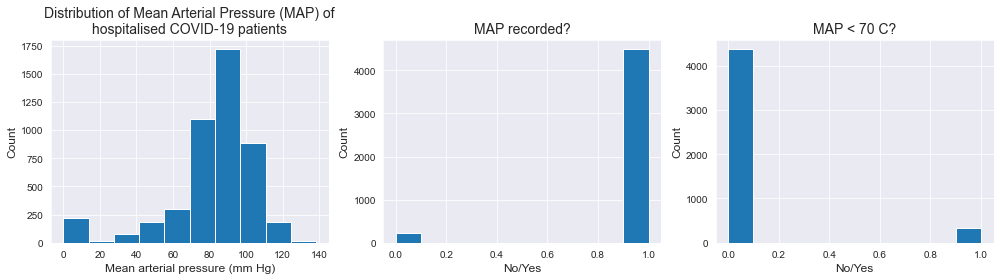

In [57]:
# Plotted distributions of data for 'MAP' (mean arterial pressure)

sns.set_style("darkgrid", {'axes.grid' : True})
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))

ax1.hist(mortality.MAP)
ax1.set_title("\n".join(wrap('Distribution of Mean Arterial Pressure (MAP) of hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Mean arterial pressure (mm Hg)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality.MAPYes)
ax2.set_title("\n".join(wrap('MAP recorded?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['MAP<70'])
ax3.set_title("\n".join(wrap('MAP < 70 C?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

People can't have a blood pressure of 0. The '0's will need to be replaced with the median or the mode MAP.

In [58]:
# Do the values in the 'MAP' column align with what's recorded in the 'MapYes' and 'MAP < 70' columns?
  # 222 '0' entries for MAP need to be converted to median values
MAP = mortality[mortality['MAP'] == 0]

# No entries are indicated as having having had their MAP taken, but with a MAP of '0' recorded.
MAP = mortality[(mortality['MAPYes'] == 1)&(mortality['MAP'] == 0)]

# One entry has a MAP value of 28.67 but has a '0' in the MapYes column.  This is row index 3265
MAP2 = mortality[(mortality['MAPYes'] == 0)&(mortality['MAP'] != 0)]

# None are incorrectly indicated in the 'MAP < 70' column
MAP3 = mortality[(mortality['MAP'] >= 70)&(mortality['MAP<70'] == 1)]

MAP3[['MAP','MAPYes','MAP<70']]

,MAP,MAPYes,MAP<70


In [59]:
# Replaced incorrect value for 'MAPYes' in row 3265
mortality.at[3265, 'MAPYes'] = 1
print(mortality.iloc[3265]['MAPYes'])

1


In [60]:
# Repaced 0 values with the median value for MAP

medianMAP = np.median(mortality['MAP'])
mortality['MAP'] = mortality['MAP'].replace(0, medianMAP)
print("Median value = ", medianMAP)

Median value =  86.67


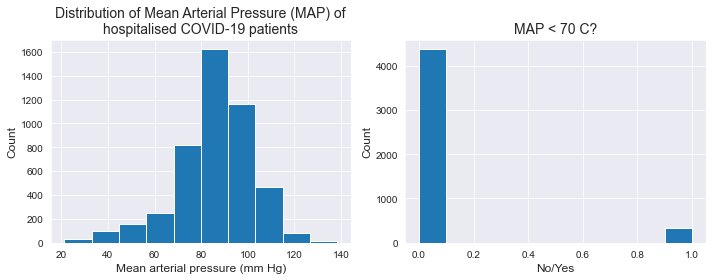

In [61]:
# New Plots -  'MAP' (mean arterial pressure)

sns.set_style("darkgrid", {'axes.grid' : True})
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.hist(mortality.MAP)
ax1.set_title("\n".join(wrap('Distribution of Mean Arterial Pressure (MAP) of hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Mean arterial pressure (mm Hg)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality['MAP<70'])
ax2.set_title("\n".join(wrap('MAP < 70 C?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

Approximately 10% of patients had mena arterial pressure below 70 mmHg, indicating inadequate blood supply to the organs and tissues. 

### 1.4.5. D-dimer

From: https://my.clevelandclinic.org/health/diagnostics/22045-d-dimer-test

A D-dimer test is a blood test that measures D-dimer, which is a protein fragment that the body makes when a blood clot dissolves. D-dimer is normally undetectable or only detectable at a very low level unless the body is forming and breaking down significant blood clots.

A positive or elevated D-dimer test result *may* indicate that the patient has a blood clotting condition. A D-dimer test can't reveal what type of clotting condition the patient may have, or where the clot is located in the body.

In [62]:
# Renamed the 'D-Dimer > 3' column to remove spaces, 
# Renamed the 'Ddimer' column for consistency

mortality.rename(columns={'D-Dimer > 3':'DDimer>3'}, inplace=True)
mortality.rename(columns={'Ddimer':'DDimer'}, inplace=True)

In [63]:
mortality[['DDimer']].describe()

,DDimer
count,4711.000000
mean,3.222452
std,5.269065
min,0.000000
25%,0.280000
50%,1.180000
75%,3.060000
max,20.000000


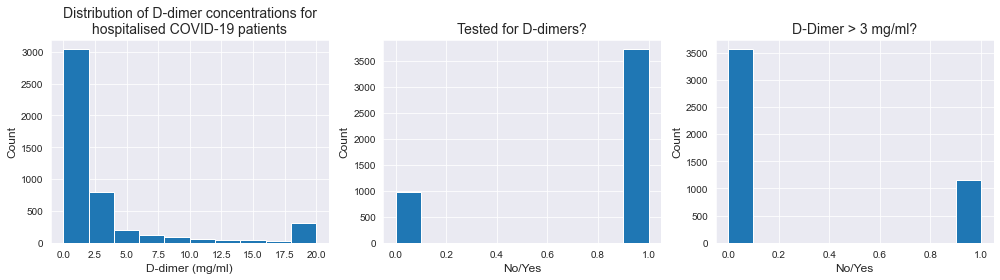

In [64]:
# Plotted distributions of data for 'D-dimer'

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.DDimer)
ax1.set_title("\n".join(wrap('Distribution of D-dimer concentrations for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("D-dimer (mg/ml)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality.DDimerYes)
ax2.set_title("\n".join(wrap('Tested for D-dimers?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['DDimer>3'])
ax3.set_title("\n".join(wrap('D-Dimer > 3 mg/ml?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [65]:
# Do the values in the 'Ddimer' column align with what's recorded in the 'DDimerYes' and 'D-Dimer > 3' columns?
  # 1101 '0' entries for DDimer: these may be genuine as Ddimer is usually barely detectable
ddimer = mortality[mortality['DDimer'] == 0]

# 986 entries are indicated as not having had their DDimer counts done; however, 115 of these have a value
  # recorded for DDimer. Need to delete the recreate the DDimerYes column. 
ddimer = mortality[mortality['DDimerYes'] == 0]
ddimer = mortality[(mortality['DDimer'] != 0)&(mortality['DDimerYes'] == 0)]

# None are incorrectly indicated in the 'D-Dimer > 3' column
ddimer2 = mortality[(mortality['DDimer'] <= 3)&(mortality['DDimer>3'] == 1)]

ddimer2[['DDimer','DDimerYes','DDimer>3']].head()

,DDimer,DDimerYes,DDimer>3


In [66]:
# Dropped the 'DDimerYes' column 
mortality = mortality.drop(['DDimerYes'], axis=1)
#mortality.columns

In [67]:
# Recreated the 'DDimerYes' column
# Created a new feature: 'DDimer>17'
mortality['DDimerYes'] = np.where(mortality['DDimer'] != 0, 1, 0)
mortality['DDimer>17'] = np.where(mortality['DDimer'] > 17, 1, 0)
print("Value counts: DDimer > 17 mg/ml", pd.DataFrame(mortality['DDimer>17'].value_counts()))
mortality[['DDimer','DDimerYes','DDimer>3','DDimer>17']].head()

Value counts: DDimer > 17 mg/ml    DDimer>17
0       4391
1        320


,DDimer,DDimerYes,DDimer>3,DDimer>17
0,0.63,1,0,0
1,2.86,1,0,0
2,2.78,1,0,0
3,3.02,1,1,0
4,1.65,1,0,0


Approximately 30% of patients had elevanted D-Dimer in their blood, indicating that the body's mechanism for break-down of blood clots was activated.

### 1.4.6. Platelets

A normal platelet count in adults ranges from 150,000 to 450,000 platelets per microliter of blood. A platelet count of less than 150,000 platelets per microliter is lower than normal.

In [68]:
mortality[['Plts']].describe()

,Plts
count,4711.000000
mean,226.393972
std,115.134763
min,0.000000
25%,158.000000
50%,212.000000
75%,279.000000
max,1226.000000


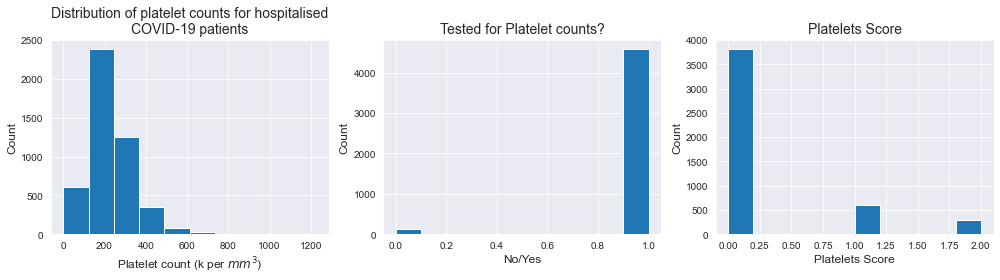

In [69]:
# Plotted distributions of data for platelet counts

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.Plts)
ax1.set_title("\n".join(wrap('Distribution of platelet counts for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Platelet count (k per $mm^3$)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality.PltsYes)
ax2.set_title("\n".join(wrap('Tested for Platelet counts?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['PltsScore'])
ax3.set_title("\n".join(wrap('Platelets Score',50)), fontsize=14)
ax3.set_xlabel("Platelets Score", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [70]:
# Do the values in the 'Plts' column align with what's recorded in the 'PltsYes' and 'PltsScore' columns?
  # 183 '0' entries for Plts, but some of these do have a value for 'PltsScore'
plts = mortality[mortality['Plts'] == 0]

# 94 entries have a value of '0' in the Plts column, yet still have a score in the PltsScore column. 

plts = mortality[(mortality['Plts'] == 0)&(mortality['PltsScore'] != 0)]

# The 'PltsYes' column aligns with the 'PltsScore' column: no patients are recorded as having not been tested for 
   # platelets and yet have a value of 1 or 2 for 'PltsScore'
plts2 = mortality[(mortality['PltsYes'] == 0)&(mortality['PltsScore'] != 0)]

# 124 individuals are recorded as not having been tested for platelets, 33 of these have a value in the Plts column
  # These need the '0' in the PltsYes column converted to '1', and a value for PltsScore generated

plts3 = mortality[(mortality['PltsYes'] == 0)]
plts3 = mortality[(mortality['Plts'] != 0)&(mortality['PltsYes'] == 0)]

plts4 = plts3[['Plts','PltsYes','PltsScore']].sort_values(by='Plts', ascending=True)
plts4

,Plts,PltsYes,PltsScore
3847,16,0,0
1333,77,0,0
4115,89,0,0
4191,111,0,0
3878,130,0,0
4102,139,0,0
4198,141,0,0
3881,142,0,0
3941,149,0,0
155,156,0,0


In [71]:
# Plts values between 1 and 99 have a PltsScore of 2
# Plts values between >= 100 have a PltsScore of 1
scorecheck = mortality[(mortality['Plts'] <= 17)&(mortality['Plts'] != 0)]
scorecheck[['Plts','PltsScore']]

scorecheck2 = mortality[(mortality['PltsScore'] == 1)]
scorecheck3 = mortality[(mortality['PltsScore'] == 2)]
scorecheck3[['Plts','PltsScore']].sort_values(by='Plts', ascending=True)

,Plts,PltsScore
4710,0,2
3987,0,2
3992,0,2
4005,0,2
4008,0,2
...,...,...
3244,98,2
1985,98,2
1254,99,2
2621,99,2


In [72]:
# This replaces all 0 values in the 'PltsScore' column with 2 if and only if 'Plts' is <100 (but >0) while 'PltsYes' is 0
mortality['PltsScore'] = np.where((mortality['Plts'] < 100)&(mortality['Plts'] != 0)&(mortality['PltsYes'] == 0), 2, mortality['PltsScore'])

# This replaces all 0 values in the 'PltsScore' column with 1 if and only if 'Plts' is >= 100 while 'PltsYes' is 0
mortality['PltsScore'] = np.where((mortality['Plts'] >= 100)&(mortality['PltsYes'] == 0), 1, mortality['PltsScore'])

In [73]:
# Dropped the 'Plts' column, as it is incomplete and is therefore less useful than the 'PltsScore'
mortality.drop('Plts', axis=1, inplace=True)
#mortality.columns

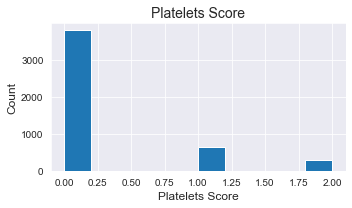

In [74]:
# New plots - platelet counts

fig, ax = plt.subplots(1,1, figsize=(5,3))

ax.hist(mortality['PltsScore'])
ax.set_title("\n".join(wrap('Platelets Score',50)), fontsize=14)
ax.set_xlabel("Platelets Score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

Approximately 20% of patients had lower than normal platelet numbers.

### 1.4.7. International Normalized Ratio

From: https://www.healthdirect.gov.au/international-normalised-ratio-INR-test#:~:text=An%20INR%20test%20measures%20the,have%20a%20blood%20clotting%20problem.

An INR test measures the time for the blood to clot. It is also known as prothrombin time, or PT. It is used to monitor blood-thinning medicines, which are also known as anticoagulants. The INR, or international normalised ratio, can also be used to check if you have a blood clotting problem.

Prothrombin is a protein produced by the liver. It is one of several proteins, known as clotting factors, that help the blood stay at the right consistency. The INR test measures this clotting factor by measuring how long it takes for the blood to clot.

Blood-thinning medicines such as warfarin are used to prevent blood clots. Warfarin is usually prescribed for people who have atrial fibrillation (where the heart beats unevenly) or who have had artificial valves fitted. How well warfarin is working is measured by how it increases the blood clotting time. So if you are taking warfarin you might need an INR test.

In [75]:
mortality[['INR']].describe()

,INR
count,4711.000000
mean,1.104989
std,0.997571
min,0.000000
25%,1.000000
50%,1.100000
75%,1.200000
max,17.000100


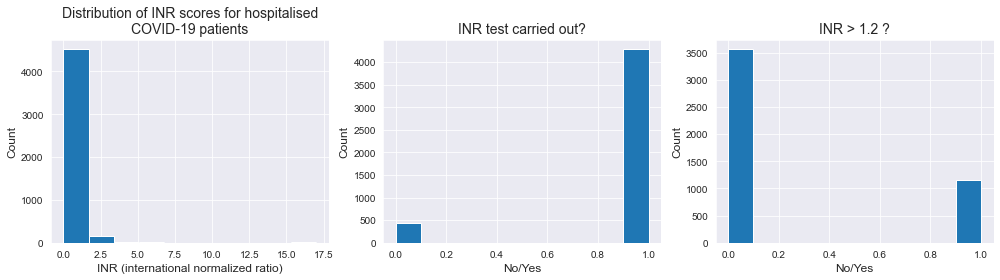

In [76]:
# Plotted distributions of data for INR test

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.INR)
ax1.set_title("\n".join(wrap('Distribution of INR scores for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("INR (international normalized ratio)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality.INRYes)
ax2.set_title("\n".join(wrap('INR test carried out?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['INR > 1.2'])
ax3.set_title("\n".join(wrap('INR > 1.2 ?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [77]:
# Do the values in the 'INR' column align with what's recorded in the 'INRYes' and 'INR > 1.2' columns?
  # 502 '0.0' entries for INR, but some of these do have a value for 'INRYes'
inr = mortality[mortality['INR'] == 0]

# 158 entries have a value of '0' in the INR column, yet are scored '1' in the INRYes column. Are these real zeros? 
inr = mortality[(mortality['INR'] == 0)&(mortality['INRYes'] != 0)]

# 27 entries have a value of '0' in the INR column, yet are scored '1' in the 'INR > 1.2' column. 
   # 25/27 of these are also scored '1' 'for INRYes'
inr2 = mortality[(mortality['INR'] == 0)&(mortality['INR > 1.2'] != 0)]

inr2[['INR', 'INRYes', 'INR > 1.2']]

# Will drop and recreate the 'INRYes' and 'INR>1.2' columns


,INR,INRYes,INR > 1.2
150,0.0,0,1
192,0.0,0,1
210,0.0,0,1
659,0.0,0,1
827,0.0,0,1
1091,0.0,0,1
1174,0.0,0,1
1397,0.0,0,1
1522,0.0,0,1
1582,0.0,0,1


In [78]:
# Dropped the 'INRYes' and 'INR > 1.2' columns 
mortality = mortality.drop(['INRYes', 'INR > 1.2'], axis=1)
#mortality.columns

In [79]:
# Recreated the 'INRYes' column
# Recreated the 'INR > 1.2' column
mortality['INRYes'] = np.where(mortality['INR'] != 0, 1, 0)
mortality['INR>1.2'] = np.where(mortality['INR'] > 1.2, 1, 0)
mortality[['INR','INRYes','INR>1.2']].head()

,INR,INRYes,INR>1.2
0,1.1,1,0
1,1.4,1,1
2,1.0,1,0
3,1.3,1,1
4,1.0,1,0


In [80]:
# Calcuated the mode, median and mean INR
    
vals,counts = np.unique(mortality['INR'], return_counts=True)
index = np.argmax(counts)
print("Mode = ", vals[index])
print("Median = ", np.median(mortality['INR']))
print("Mean = ", np.mean(mortality['INR']))

# Repaced 0 values with the mode value for INR
mortality['INR'] = mortality['INR'].replace(0, vals[index])

Mode =  1.0
Median =  1.1
Mean =  1.1049885586924217


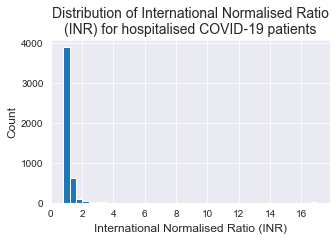

In [81]:
# New plot - INR
fig, ax = plt.subplots(figsize=(5,3))
ax.hist(mortality.INR, bins=40)
ax.set_title("\n".join(wrap('Distribution of International Normalised Ratio (INR) for hospitalised COVID-19 patients',50)), fontsize=14)
ax.set_xlabel("International Normalised Ratio (INR)", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.show()

Approximately a third of patients had abnormal INR, indicating that they may have issues with blood clotting, potentially from being on blood-thinning medication like warfarin.

### 1.4.8. Creatinine

Creatinine is a chemical waste product of creatine. Creatine is a chemical made by the body and is used to supply energy mainly to muscles. This test is done to see how well your kidneys work. Creatinine is removed from the body entirely by the kidneys.

A normal result is 0.7 to 1.3 mg/dL (61.9 to 114.9 µmol/L) for men and 0.6 to 1.1 mg/dL (53 to 97.2 µmol/L) for women. Women often have a lower creatinine level than men.

In [82]:
mortality[['Creatinine']].describe()

,Creatinine
count,4711.000000
mean,1.947453
std,2.637810
min,0.000000
25%,0.800000
50%,1.100000
75%,1.800000
max,31.660000


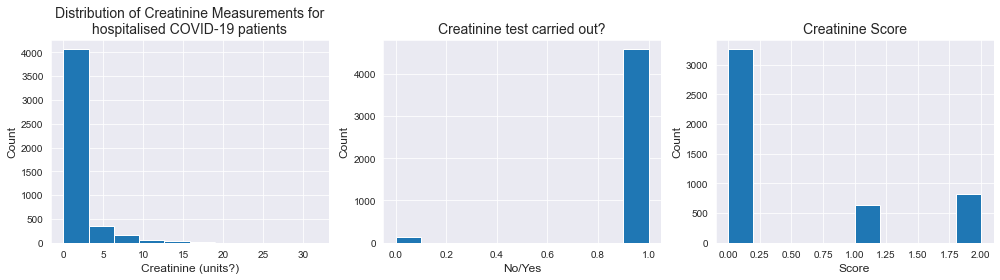

In [83]:
# Plotted distributions of data for Creatinine test

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.Creatinine)
ax1.set_title("\n".join(wrap('Distribution of Creatinine Measurements for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Creatinine (units?)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality.CrtnYes)
ax2.set_title("\n".join(wrap('Creatinine test carried out?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['CrtnScore'])
ax3.set_title("\n".join(wrap('Creatinine Score',50)), fontsize=14)
ax3.set_xlabel("Score", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [84]:
# Do the values in the 'Creatinine' column align with what's recorded in the 'CrtnYes' and 'CrtnScore' columns?
  # 190 entries have a value of '0' in the Creatinine column; some are scored '1' in the CrtnYes column. Are these real zeros? 
crtn = mortality[mortality['Creatinine'] == 0]

# 87 entries have a value of '0' in the Creatinine column but are scored '1' in the CrtnYes column
crtn = mortality[(mortality['Creatinine'] == 0)&(mortality['CrtnYes'] != 0)]

# None have a value of '0' in the Creatinine column and a value >0 in the CrtnScore column. 
crtn2 = mortality[(mortality['Creatinine'] == 0)&(mortality['CrtnScore'] != 0)]

crtn2[['Creatinine', 'CrtnYes', 'CrtnScore']]

,Creatinine,CrtnYes,CrtnScore


In [85]:
# Updated the 'CrtnYes' column to align with the 'Creatinine' column
mortality['CrtnYes'] = np.where(mortality['Creatinine'] != 0, 1, 0)

In [86]:
# Calcuated the mode, median and mean values for Creatinine
    
vals,counts = np.unique(mortality['Creatinine'], return_counts=True)
index = np.argmax(counts)
print("Mode = ", vals[index])
print("Median = ", np.median(mortality['Creatinine']))
print("Mean = ", np.mean(mortality['Creatinine']))

# Repaced 0 values with the median value for Creatinine
mortality['Creatinine'] = mortality['Creatinine'].replace(0, np.median(mortality['Creatinine']))

Mode =  0.8
Median =  1.1
Mean =  1.947452767989805


In [87]:
# Creatinine values less than 1.51 have a CrtnScore of 0
# Creatinine values between 1.51 and 2.5 have a CrtnScore of 1
# Creatinine values between 2.51 and 31.66 have a CrtnScore of 2

scorecheck1 = mortality[(mortality['CrtnScore'] == 1)]
scorecheck2 = mortality[(mortality['CrtnScore'] == 2)]

# Created a new score (score=3) for Creatinine values over 5
mortality['CrtnScore'] = np.where(mortality['Creatinine'] >= 5, 3, mortality['CrtnScore'])

mortality[['Creatinine', 'CrtnYes', 'CrtnScore']].sort_values('CrtnScore', ascending=False)

# Creatinine values greater than or equal to 5 have a CrtnScore of 3

,Creatinine,CrtnYes,CrtnScore
3464,6.32,1,3
2053,13.82,1,3
1507,5.70,1,3
530,13.78,1,3
3006,11.25,1,3
...,...,...,...
1896,1.00,1,0
1897,0.89,1,0
1900,0.55,1,0
1901,0.46,1,0


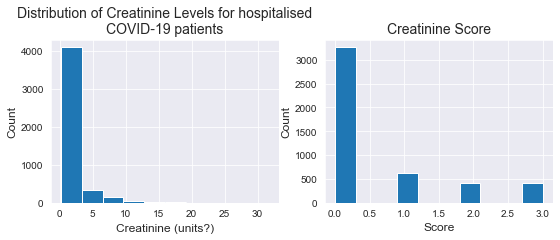

In [88]:
# New plot - Creatinine
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(9,3))
ax1.hist(mortality.Creatinine)
ax1.set_title("\n".join(wrap('Distribution of Creatinine Levels for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Creatinine (units?)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality.CrtnScore)
ax2.set_title("\n".join(wrap('Creatinine Score',50)), fontsize=14)
ax2.set_xlabel("Score", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

plt.show()

Approximately half of patients had abnormal values for creatinine, indicating potential kidney problems. 

### 1.4.9. Sodium

Normal sodium levels are usually between 136 and 145 millimoles per liter (mmol/L). Blood sodium levels below 136 mmol/L may mean low blood sodium (hyponatremia). Blood sodium levels greater than 145 mmol/L may mean blood sodium levels that are too high (hypernatremia). 

From: https://www.urmc.rochester.edu/encyclopedia/content.aspx?contenttypeid=167&contentid=sodium_blood#:~:text=Normal%20sodium%20levels%20are%20usually,are%20too%20high%20(hypernatremia).

In [89]:
mortality[['Sodium']].describe()

,Sodium
count,4711.000000
mean,131.210578
std,31.016418
min,0.000000
25%,134.000000
50%,137.000000
75%,140.000000
max,170.001000


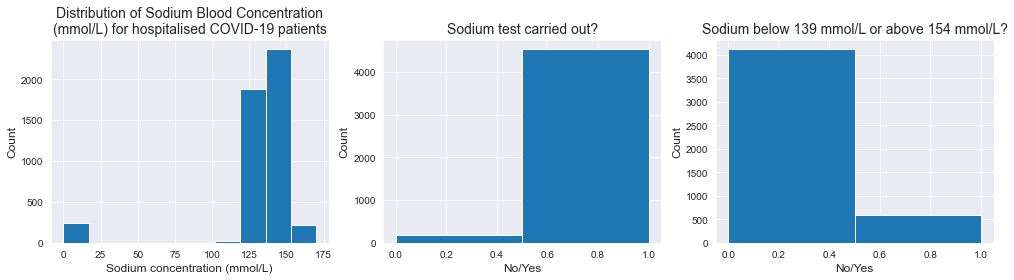

In [90]:
# Plotted distributions of data for Sodium test

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.Sodium)
ax1.set_title("\n".join(wrap('Distribution of Sodium Blood Concentration (mmol/L) for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Sodium concentration (mmol/L)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality.SodimuYes, bins=2)
ax2.set_title("\n".join(wrap('Sodium test carried out?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['Sodium < 139 or > 154'], bins=2)
ax3.set_title("\n".join(wrap('Sodium below 139 mmol/L or above 154 mmol/L?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [91]:
# Do the values in the 'Sodium' column align with what's recorded in the 'SodiumYes' and 'Sodium < 139 or > 154' columns?
  # 236 entries have a value of '0' in the Sodium column; some are scored '1' in the SodiumYes column 
    # and '1' in the Sodium < 139 or > 154' columns. Are these real zeros? 
sodium = mortality[mortality['Sodium'] == 0]

# 93 entries have a value of '0' in the Sodium column but are scored '1' in the SodiumYes column
sodium = mortality[(mortality['Sodium'] == 0)&(mortality['SodimuYes'] != 0)]

# 93 entries have a value of '0' in the Creatinine column and a value >0 in the CrtnScore column. 
sodium2 = mortality[(mortality['Sodium'] == 0)&(mortality['Sodium < 139 or > 154'] != 0)]

sodium2[['Sodium', 'SodimuYes', 'Sodium < 139 or > 154']]

# Without an actual confirmed value for sodium concentration it is safer to impute median values for these 
  # individuals and remove them from the low/high sodium category.

,Sodium,SodimuYes,Sodium < 139 or > 154
3848,0.0,1,1
3849,0.0,1,1
3860,0.0,1,1
3869,0.0,1,1
3870,0.0,1,1
...,...,...,...
4686,0.0,1,1
4687,0.0,1,1
4688,0.0,1,1
4691,0.0,1,1


In [92]:
# Updated the 'SodiumYes' column to align with the 'Sodium' column
mortality.drop('SodimuYes', axis=1, inplace=True)
mortality['SodiumYes'] = np.where(mortality['Sodium'] != 0, 1, 0)

In [93]:
# Renamed the 'Sodium < 139 or > 154' column to remove spaces
mortality.rename(columns={'Sodium < 139 or > 154':'Sodium139<>154'}, inplace=True)

In [94]:
# Calcuated the mode, median and mean values for Sodium
    
vals,counts = np.unique(mortality['Sodium'], return_counts=True)
index = np.argmax(counts)
print("Mode = ", vals[index])
print("Median = ", np.median(mortality['Sodium']))
print("Mean = ", np.mean(mortality['Sodium']))

# Repaced 0 values with the median value for Sodium
mortality['Sodium'] = mortality['Sodium'].replace(0, np.median(mortality['Sodium']))

Mode =  137.0
Median =  137.0
Mean =  131.2105782211845


In [95]:
# Created a new feature, as the lower bound of the 'Sodium139<>154' feature is too high for this cohort, 
  # and the upper band would usually be placed a little lower
# Created an additional feature for very high sodium levels

mortality['Sodium130<>145'] = np.where((mortality['Sodium'] <= 130) | (mortality['Sodium'] >= 145),1, 0)
mortality['Sodium>155'] = np.where(mortality['Sodium'] >= 155, 1, 0)

# Dropped the 'Sodium139<>154' feature
mortality.drop('Sodium139<>154', axis=1, inplace=True)
mortality[['Sodium','SodiumYes','Sodium130<>145','Sodium>155']]

,Sodium,SodiumYes,Sodium130<>145,Sodium>155
0,135.0,1,0,0
1,137.0,1,0,0
2,140.0,1,0,0
3,132.0,1,0,0
4,149.0,1,1,0
...,...,...,...,...
4706,139.0,1,0,0
4707,136.0,1,0,0
4708,136.0,1,0,0
4709,137.0,1,0,0


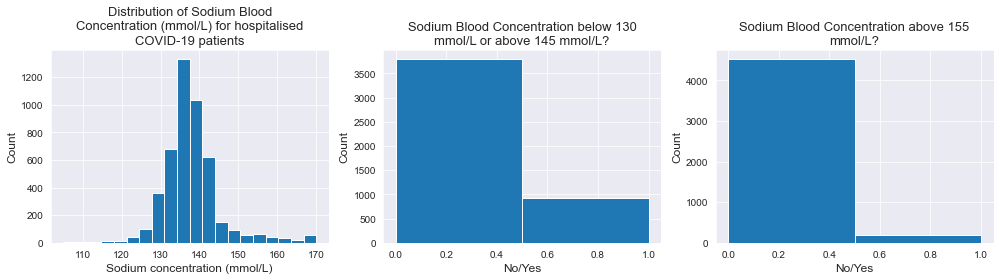

In [96]:
# New plot - Sodium
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(14,4))
ax1.hist(mortality.Sodium, bins=20)
ax1.set_title("\n".join(wrap('Distribution of Sodium Blood Concentration (mmol/L) for hospitalised COVID-19 patients',40)), fontsize=13)
ax1.set_xlabel("Sodium concentration (mmol/L)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality['Sodium130<>145'], bins=2)
ax2.set_title("\n".join(wrap('Sodium Blood Concentration below 130 mmol/L or above 145 mmol/L?',40)), fontsize=13)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['Sodium>155'], bins=2)
ax3.set_title("\n".join(wrap('Sodium Blood Concentration above 155 mmol/L?',40)), fontsize=13)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

Approximately 25% of patients had higher than desirable blood sodium levels.

### 1.4.10. Glucose

A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal. A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes. A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes.

In [97]:
# Replaced column names
mortality.rename(columns={'GlucoseYese':'GlucoseYes'}, inplace=True)
mortality.rename(columns={'Glucose <60 or > 500':'Glucose<60>500'}, inplace=True)

In [98]:
mortality[['Glucose']].describe()

,Glucose
count,4711.000000
mean,127.809807
std,131.011864
min,0.000000
25%,0.000000
50%,117.000000
75%,164.000000
max,1000.001000


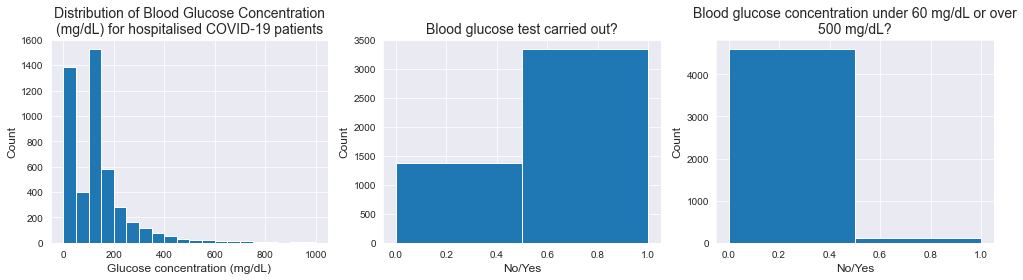

In [99]:
# Plotted distributions of data for blood glucose test

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.Glucose, bins=20)
ax1.set_title("\n".join(wrap('Distribution of Blood Glucose Concentration (mg/dL) for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Glucose concentration (mg/dL)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality.GlucoseYes, bins=2)
ax2.set_title("\n".join(wrap('Blood glucose test carried out?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['Glucose<60>500'], bins=2)
ax3.set_title("\n".join(wrap('Blood glucose concentration under 60 mg/dL or over 500 mg/dL?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [100]:
# Do the values in the 'Glucose' column align with what's recorded in the 'GlucoseYes' and 'Glucose<60>500' columns?
  # 1373 entries have a value of '0' in the Glucose column; Are these real zeros? 
glucose = mortality[mortality['Glucose'] == 0]

# No entries have a value of '0' in the Glucose column but are scored '1' in the Glucose column
glucose = mortality[(mortality['Glucose'] == 0)&(mortality['GlucoseYes'] != 0)]

# No entries have a value of '0' in the Glucose column and a value >0 in the 'Glucose<60>500' column. 
glucose2 = mortality[(mortality['Glucose'] == 0)&(mortality['Glucose<60>500'] != 0)]

glucose2[['Glucose', 'GlucoseYes', 'Glucose<60>500']]
    

,Glucose,GlucoseYes,Glucose<60>500


In [101]:
# Calcuated the mode, median and mean values for Glucose
    
vals,counts = np.unique(mortality['Glucose'], return_counts=True)
index = np.argmax(counts)
print("Mode = ", vals[index])
print("Median = ", np.median(mortality['Glucose']))
print("Mean = ", np.mean(mortality['Glucose']))

# Repaced 0 values with the median value for Glucose
mortality['Glucose'] = mortality['Glucose'].replace(0, np.median(mortality['Glucose']))

Mode =  0.0
Median =  117.0
Mean =  127.80980747187434


In [102]:
# Created new features for high and low blood glucose
   # Created a new feature, as the upper bound of the 'Glucose<60>500' feature is too high.
   # Created an additional feature for very high glucose levels

mortality['Glucose<60>140'] = np.where((mortality['Glucose'] <= 60) | (mortality['Glucose'] >= 141), 1, 0)
mortality['Glucose>200'] = np.where(mortality['Glucose'] >= 200, 1, 0)

# Dropped the 'Glucose60<>500' feature
mortality.drop('Glucose<60>500', axis=1, inplace=True)
mortality[['Glucose','GlucoseYes','Glucose<60>140','Glucose>200']]

,Glucose,GlucoseYes,Glucose<60>140,Glucose>200
0,112.0,1,0,0
1,265.0,1,1,1
2,121.0,1,0,0
3,117.0,0,0,0
4,117.0,0,0,0
...,...,...,...,...
4706,97.0,1,0,0
4707,117.0,0,0,0
4708,153.0,1,1,0
4709,131.0,1,0,0


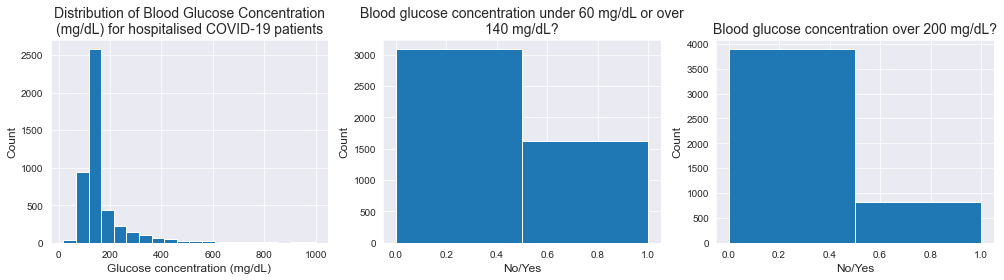

In [103]:
# New plot - Glucose

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.Glucose, bins=20)
ax1.set_title("\n".join(wrap('Distribution of Blood Glucose Concentration (mg/dL) for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Glucose concentration (mg/dL)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality['Glucose<60>140'], bins=2)
ax2.set_title("\n".join(wrap('Blood glucose concentration under 60 mg/dL or over 140 mg/dL?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['Glucose>200'], bins=2)
ax3.set_title("\n".join(wrap('Blood glucose concentration over 200 mg/dL?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

Approximately 50% of patients had blood glucose levels indicative of pre-diabetes or diabetes. 

### 1.4.11. Aspartate aminotransferase (AST)

AST (aspartate aminotransferase) is an enzyme that is found mostly in the liver, but it's also in muscles and other organs in the body. When cells that contain AST are damaged, they release AST into the bloodstream. An AST blood test measures the amount of AST in the blood. The test is commonly used to help diagnose liver damage or disease.

Other names: SGOT test, serum glutamic oxaloacetic transaminase test; aspartate transaminase test.

Reference: https://medlineplus.gov/lab-tests/ast-test/#:~:text=ALT%20stands%20for%20alanine%20transaminase,and%20substances%20in%20the%20liver.

The normal range is 8 to 33 U/L. https://www.mountsinai.org/health-library/tests/aspartate-aminotransferase-ast-blood-test#:~:text=Normal%20Results,of%20your%20specific%20test%20results.

In [104]:
# Replaced column names to get rid of spaces
mortality.rename(columns={'AST > 40':'AST>40'}, inplace=True)

In [105]:
mortality[['AST']].describe()

,AST
count,4711.000000
mean,63.208024
std,204.495408
min,0.000000
25%,24.000000
50%,38.000000
75%,63.000000
max,10000.000000


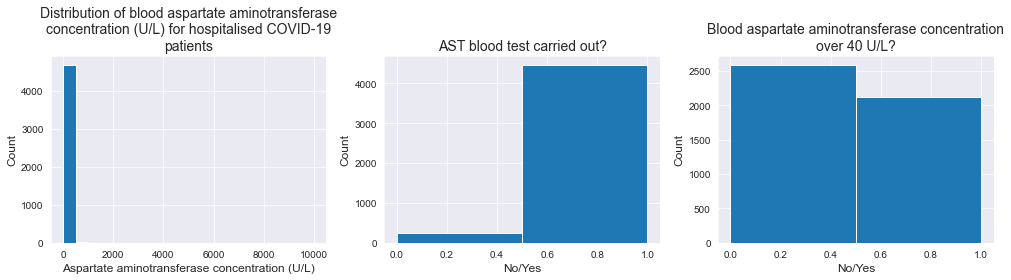

In [106]:
# Plotted distributions of data for AST blood test

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.AST, bins=20)
ax1.set_title("\n".join(wrap('Distribution of blood aspartate aminotransferase concentration (U/L) for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Aspartate aminotransferase concentration (U/L)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality.ASTYes, bins=2)
ax2.set_title("\n".join(wrap('AST blood test carried out?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['AST>40'], bins=2)
ax3.set_title("\n".join(wrap('Blood aspartate aminotransferase concentration over 40 U/L?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

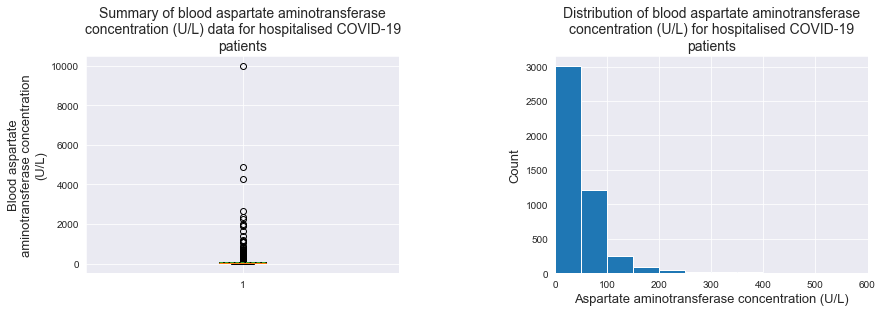

In [107]:
# It looks like there are significant outliers in the 'AST' column
  # Checking outliers with box plot
     # No way to tell if some of the largest values are errors or not
    
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,4))
ax1.boxplot("AST", whis=True, meanline=True, showmeans=True, showcaps=True, 
                          showfliers=True, data=mortality)

ax1.set_title("\n".join(wrap('Summary of blood aspartate aminotransferase concentration (U/L) data for hospitalised COVID-19 patients',50)), 
              fontsize=14)
ax1.set_ylabel("\n".join(wrap('Blood aspartate aminotransferase concentration (U/L)',30)), fontsize=13)

ax2.hist(mortality.AST, bins=200)
ax2.set_title("\n".join(wrap('Distribution of blood aspartate aminotransferase concentration (U/L) for hospitalised COVID-19 patients',50)), fontsize=14)
ax2.set_xlabel("Aspartate aminotransferase concentration (U/L)", fontsize=13)
ax2.set_ylabel("Count", fontsize=13)
ax2.set_xlim([0, 600])

plt.subplots_adjust(wspace=0.5, hspace=1)
plt.tight_layout
plt.show()

In [108]:
# Do the values in the 'AST' column align with what's recorded in the 'ASTYes' and 'AST>40' columns?
  # 303 entries have a value of '0' in the AST column; Are these real zeros? 
AST = mortality[mortality['AST'] == 0]

# 109 entries have a value of '0' in the AST column but are scored '1' in the ASTYes column
AST = mortality[(mortality['AST'] == 0)&(mortality['ASTYes'] != 0)]

# No entries have a value of '0' in the AST column and a value >0 in the 'AST>40' column. 
AST2 = mortality[(mortality['AST'] == 0)&(mortality['AST>40'] != 0)]

AST2[['AST', 'ASTYes', 'AST>40']]
    

,AST,ASTYes,AST>40


In [109]:
# Updated the 'ASTYes' column to align with the 'AST' column
mortality.drop('ASTYes', axis=1, inplace=True)
mortality['ASTYes'] = np.where(mortality['AST'] != 0, 1, 0)

In [110]:
# Calcuated the mode, median and mean values for aspartate aminotransferase
    
vals,counts = np.unique(mortality['AST'], return_counts=True)
index = np.argmax(counts)
print("Mode = ", vals[index])
print("Median = ", np.median(mortality['AST']))
print("Mean = ", np.mean(mortality['AST']))

# Repaced 0 values with the median value for AST
mortality['AST'] = mortality['AST'].replace(0, np.median(mortality['AST']))

Mode =  20
Median =  38.0
Mean =  63.208023774145616


In [111]:
# Created new features for high AST, as the upper bound of the 'AST>40' feature is too low.

mortality['AST>100'] = np.where(mortality['AST'] >= 100 , 1, 0)
mortality['AST>50'] = np.where(mortality['AST'] >= 50 , 1, 0)

# Dropped the 'AST>40' feature
mortality.drop('AST>40', axis=1, inplace=True)
mortality[['AST','ASTYes','AST>50','AST>100']]

,AST,ASTYes,AST>50,AST>100
0,26,1,0,0
1,85,1,1,0
2,32,1,0,0
3,44,1,0,0
4,38,1,0,0
...,...,...,...,...
4706,23,1,0,0
4707,40,1,0,0
4708,26,1,0,0
4709,31,1,0,0


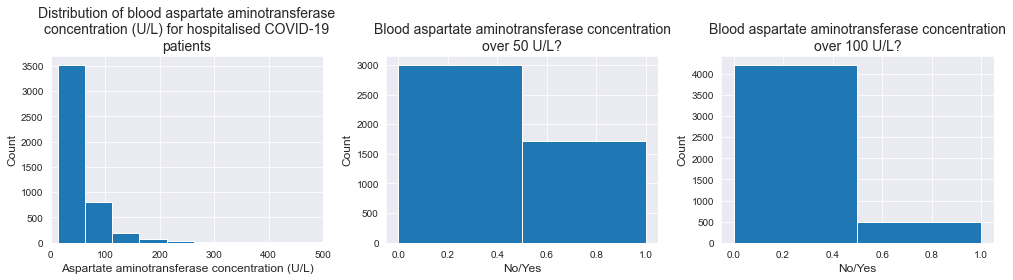

In [112]:
# New plots - AST

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.AST, bins=200)
ax1.set_title("\n".join(wrap('Distribution of blood aspartate aminotransferase concentration (U/L) for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Aspartate aminotransferase concentration (U/L)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xlim(0,500)

ax2.hist(mortality['AST>50'], bins=2)
ax2.set_title("\n".join(wrap('Blood aspartate aminotransferase concentration over 50 U/L?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['AST>100'], bins=2)
ax3.set_title("\n".join(wrap('Blood aspartate aminotransferase concentration over 100 U/L?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

More than 50% of patients had abnormnally high AST levels, indicating potential liver damage. Just over 10% of these had very high levels of AST - over 100 Units/litre. 

### 1.4.12. Alanine transaminase (ALT)

Alanine transaminase is an enzyme found mostly in the liver. An ALT test measures the amount of ALT in the blood.

When liver cells are damaged, they release ALT into the bloodstream. High levels of ALT in the blood may be a sign of a liver injury or disease. Some types of liver disease cause high ALT levels before symptoms of the disease appear. An ALT blood test may help diagnose certain liver diseases early.

Other names: Serum Glutamic-Pyruvic Transaminase (SGPT), GPT.

Reference: https://medlineplus.gov/lab-tests/ast-test/#:~:text=ALT%20stands%20for%20alanine%20transaminase,and%20substances%20in%20the%20liver.

The normal range is 4 to 36 U/L. https://www.mountsinai.org/health-library/tests/alanine-transaminase-alt-blood-test#:~:text=Normal%20Results,or%20may%20test%20different%20samples.

In [113]:
mortality[['ALT']].describe()

,ALT
count,4711.000000
mean,42.846904
std,108.989407
min,0.000000
25%,16.000000
50%,26.000000
75%,43.000000
max,3228.000000


In [114]:
# Replaced column names to get rid of spaces
mortality.rename(columns={'ALT > 40':'ALT>40'}, inplace=True)

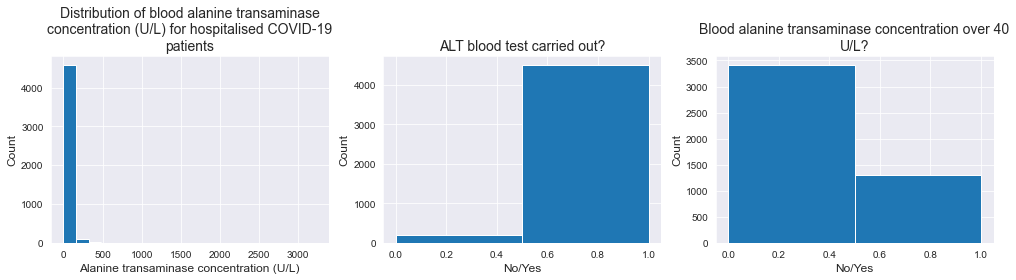

In [115]:
# Plotted distributions of data for ALT blood test

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.ALT, bins=20)
ax1.set_title("\n".join(wrap('Distribution of blood alanine transaminase concentration (U/L) for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Alanine transaminase concentration (U/L)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality.ALTYes, bins=2)
ax2.set_title("\n".join(wrap('ALT blood test carried out?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['ALT>40'], bins=2)
ax3.set_title("\n".join(wrap('Blood alanine transaminase concentration over 40 U/L?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

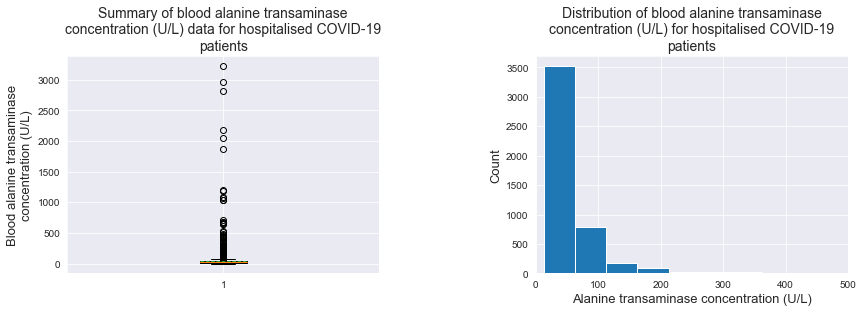

In [116]:
# It looks like there are significant outliers in the 'ALT' column
  # Checking outliers with box plot
     # No way to tell if some of the largest values are errors or not
    
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,4))
ax1.boxplot("ALT", whis=True, meanline=True, showmeans=True, showcaps=True, 
                          showfliers=True, data=mortality)

ax1.set_title("\n".join(wrap('Summary of blood alanine transaminase concentration (U/L) data for hospitalised COVID-19 patients',50)), 
              fontsize=14)
ax1.set_ylabel("\n".join(wrap('Blood alanine transaminase concentration (U/L)',30)), fontsize=13)

ax2.hist(mortality.AST, bins=200)
ax2.set_title("\n".join(wrap('Distribution of blood alanine transaminase concentration (U/L) for hospitalised COVID-19 patients',50)), fontsize=14)
ax2.set_xlabel("Alanine transaminase concentration (U/L)", fontsize=13)
ax2.set_ylabel("Count", fontsize=13)
ax2.set_xlim([0, 500])

plt.subplots_adjust(wspace=0.5, hspace=1)
plt.tight_layout
plt.show()

In [117]:
# Do the values in the 'ALT' column align with what's recorded in the 'ALTYes' and 'ALT>40' columns?
  # 256 entries have a value of '0' in the ALT column; Are these real zeros? 
ALT = mortality[mortality['ALT'] == 0]

# 98 entries have a value of '0' in the ALT column but are scored '1' in the ALTYes column
ALT = mortality[(mortality['ALT'] == 0)&(mortality['ALTYes'] != 0)]

# No entries have a value of '0' in the ALT column and a value >0 in the 'ALT>40' column. 
ALT2 = mortality[(mortality['ALT'] == 0)&(mortality['ALT>40'] != 0)]

ALT2[['ALT', 'ALTYes', 'ALT>40']]

,ALT,ALTYes,ALT>40


In [118]:
# Updated the 'ALTYes' column to align with the 'ALT' column
mortality.drop('ALTYes', axis=1, inplace=True)
mortality['ALTYes'] = np.where(mortality['ALT'] != 0, 1, 0)

In [119]:
# Calcuated the mode, median and mean values for alanine transaminase concentration
    
vals,counts = np.unique(mortality['ALT'], return_counts=True)
index = np.argmax(counts)
print("Mode = ", vals[index])
print("Median = ", np.median(mortality['ALT']))
print("Mean = ", np.mean(mortality['ALT']))

# Repaced 0 values with the median value for ALT
mortality['ALT'] = mortality['ALT'].replace(0, np.median(mortality['ALT']))

Mode =  0.0
Median =  26.0
Mean =  42.84690362980271


In [120]:
# Created new features for high ALT, as the upper bound of the 'ALT>40' feature is too low.

mortality['ALT>100'] = np.where(mortality['ALT'] >= 100 , 1, 0)
mortality['ALT>50'] = np.where(mortality['ALT'] >= 50 , 1, 0)

# Dropped the 'ALT>40' feature
mortality.drop('ALT>40', axis=1, inplace=True)
mortality[['ALT','ALTYes','ALT>50','ALT>100']]

,ALT,ALTYes,ALT>50,ALT>100
0,14.0,1,0,0
1,32.0,1,0,0
2,18.0,1,0,0
3,17.0,1,0,0
4,28.0,1,0,0
...,...,...,...,...
4706,24.0,1,0,0
4707,30.0,1,0,0
4708,16.0,1,0,0
4709,33.0,1,0,0


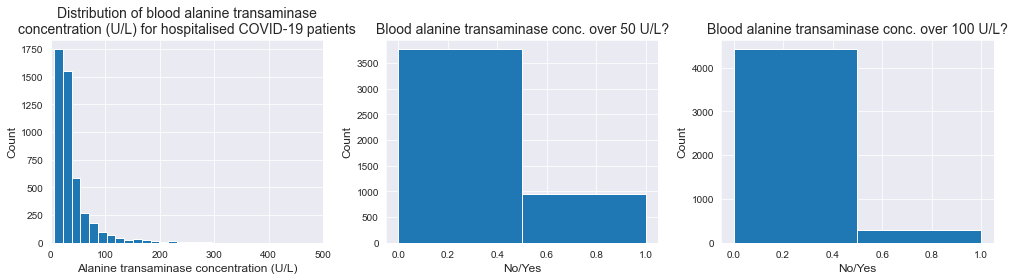

In [121]:
# New plots

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.ALT, bins=200)
ax1.set_title("\n".join(wrap('Distribution of blood alanine transaminase concentration (U/L) for hospitalised COVID-19 patients',55)), fontsize=14)
ax1.set_xlabel("Alanine transaminase concentration (U/L)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xlim(0,500)

ax2.hist(mortality['ALT>50'], bins=2)
ax2.set_title("\n".join(wrap('Blood alanine transaminase conc. over 50 U/L?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['ALT>100'], bins=2)
ax3.set_title("\n".join(wrap('Blood alanine transaminase conc. over 100 U/L?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

More than 25% of patients had abnormnally high ALT levels, indicating potential liver damage. Just over 5% of these had very high levels of ALT - over 100 Units/litre. 

### 1.4.13. White Blood Cells (WBC)

The number of white blood cells in a volume of blood. Normal range varies slightly between laboratories but is generally between 4,300 and 10,800 cells per cubic millimeter (cmm). This can also be referred to as the leukocyte count and can be expressed in international units as 4.3 - 10.8 x 10^9 cells per litre.

In [122]:
mortality[['WBC']].describe()

,WBC
count,4711.000000
mean,8.471598
std,7.356330
min,0.000000
25%,5.400000
50%,7.300000
75%,10.200000
max,219.700000


In [123]:
# Replaced column names to get rid of spaces
mortality.rename(columns={'WBC <1.8 or > 4.8':'WBC<1.8>4.8'}, inplace=True)

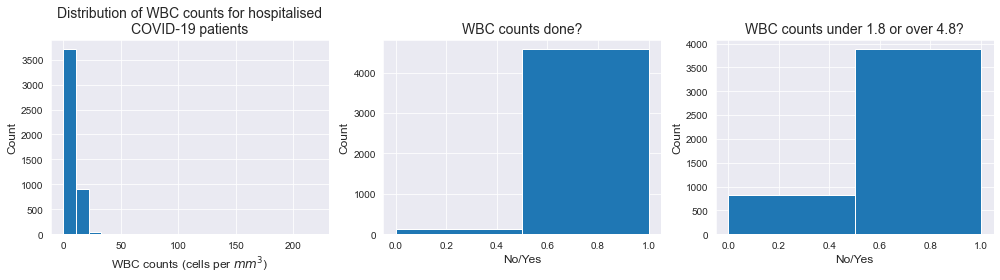

In [124]:
# Plotted distributions of data for WBC counts

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.WBC, bins=20)
ax1.set_title("\n".join(wrap('Distribution of WBC counts for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("WBC counts (cells per $mm^3$)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality.WBCYes, bins=2)
ax2.set_title("\n".join(wrap('WBC counts done?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['WBC<1.8>4.8'], bins=2)
ax3.set_title("\n".join(wrap('WBC counts under 1.8 or over 4.8?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

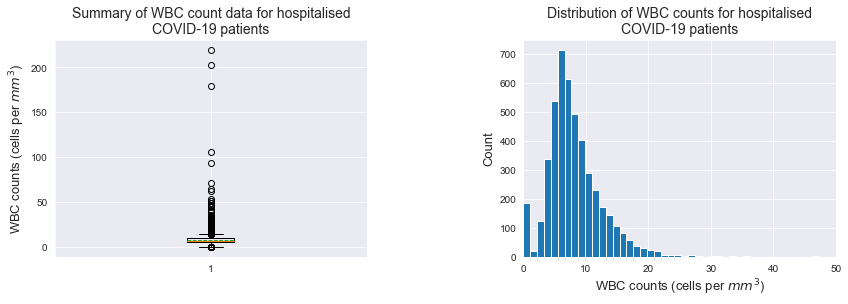

In [125]:
# It looks like there are significant outliers in the 'WBC' column
  # Checking outliers with box plot
     # No way to tell if some of the largest values are errors or not
    
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,4))
ax1.boxplot("WBC", whis=True, meanline=True, showmeans=True, showcaps=True, 
                          showfliers=True, data=mortality)

ax1.set_title("\n".join(wrap('Summary of WBC count data for hospitalised COVID-19 patients',50)), 
              fontsize=14)
ax1.set_ylabel("\n".join(wrap('WBC counts (cells per $mm^3$)',30)), fontsize=13)

ax2.hist(mortality.WBC, bins=200)
ax2.set_title("\n".join(wrap('Distribution of WBC counts for hospitalised COVID-19 patients',50)), fontsize=14)
ax2.set_xlabel("WBC counts (cells per $mm^3$)", fontsize=13)
ax2.set_ylabel("Count", fontsize=13)
ax2.set_xlim([0, 50])

plt.subplots_adjust(wspace=0.5, hspace=1)
plt.tight_layout
plt.show()

In [126]:
# Do the values in the 'WBC' column align with what's recorded in the 'WBCYes' and 'WBC<1.8>4.8' columns?
  # 179 entries have a value of '0' in the WBC column; Are these real zeros? 
WBC = mortality[mortality['WBC'] == 0]

# 84 entries have a value of '0' in the WBC column but are scored '1' in the WBCYes column
WBC = mortality[(mortality['WBC'] == 0)&(mortality['WBCYes'] != 0)]

# The same 84 entries have a value of '0' in the WBC column and a value of 1 in the 'WBC<1.8>4.8' column. 
WBC2 = mortality[(mortality['WBC'] == 0)&(mortality['WBC<1.8>4.8'] != 0)]

WBC2[['WBC', 'WBCYes', 'WBC<1.8>4.8']]

# Will need to drop and recreate these features

,WBC,WBCYes,WBC<1.8>4.8
3848,0.0,1,1
3849,0.0,1,1
3854,0.0,1,1
3860,0.0,1,1
3869,0.0,1,1
...,...,...,...
4686,0.0,1,1
4687,0.0,1,1
4688,0.0,1,1
4691,0.0,1,1


In [127]:
# Recreated the 'WBCYes' column to align with the 'WBC' column
mortality.drop('WBCYes', axis=1, inplace=True)
mortality['WBCYes'] = np.where(mortality['WBC'] != 0, 1, 0)

In [128]:
# Calcuated the mode, median and mean values for WBC counts
    
vals,counts = np.unique(mortality['WBC'], return_counts=True)
index = np.argmax(counts)
print("Mode = ", vals[index])
print("Median = ", np.median(mortality['WBC']))
print("Mean = ", np.mean(mortality['WBC']))

# Repaced 0 values with the median value for WBC count
mortality['WBC'] = mortality['WBC'].replace(0, np.median(mortality['WBC']))

Mode =  0.0
Median =  7.3
Mean =  8.471598386754408


In [129]:
# Dropped the 'WBC<1.8>4.8' column and created a new feature with different thresholds, as 4.8 cells/mm^3 is well
  # within the typical values for WBC count
mortality.drop('WBC<1.8>4.8', axis=1, inplace=True)
mortality['WBC<4.3>10.8'] = np.where((mortality['WBC'] < 4.3)|(mortality['WBC'] > 10.8), 1, 0)

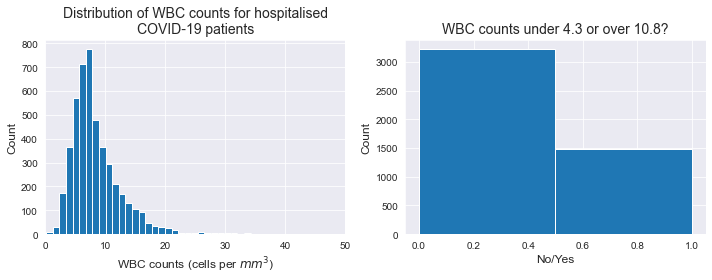

In [130]:
# New plots

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.hist(mortality.WBC, bins=200)
ax1.set_title("\n".join(wrap('Distribution of WBC counts for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("WBC counts (cells per $mm^3$)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xlim(0,50)

ax2.hist(mortality['WBC<4.3>10.8'], bins=2)
ax2.set_title("\n".join(wrap('WBC counts under 4.3 or over 10.8?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

Nearly half of patients had abnormal WBC counts, with most of these having an over-abundance of WBCs, indicating that they were fighting an infection. 

### 1.4.14. Lymphocytes

Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7405282/

Reference: https://www.webmd.com/a-to-z-guides/what-are-lymphocytes

Normal lymphocyte ranges depend on age. For adults, normal lymphocyte count is between 1,000 and 4,800 lymphocytes per microlitre of blood. For children, it’s between 3,000 and 9,500 lymphocytes per microlitre of blood.

Lymphocytosis is when the lymphocytes count is higher than normal. Having a high lymphocyte count means that the body is fighting an infection. Having significantly more than 3,000 lymphocytes in 1 microlitre of blood is considered to be a high lymphocyte count in adults. For children, it can be as high as 9,000 lymphocytes per microlitre. The ranges for lymphocytosis can vary slightly depending on the type of test.

Lymphocytopenia or lymphopenia is is an abnormally low lymphocyte count.

A lymphocyte count of less than 1,000 lymphocytes per microlitre of blood is generally considered to be lymphocytopenia in adults. In children, a low lymphocyte count is when it's less than 3,000 lymphocytes per microlitre of blood. The normal ranges of lymphocytes can vary depending on the test

Some underlying conditions may cause low T lymphocyte numbers, while others may cause low B lymphocyte numbers.
A number of conditions can cause low lymphocyte count:

    - Blood diseases like Hodgkin’s disease
    - Autoimmune disorders like lupus
    - Infectious diseases like tuberculosis, AIDS, and viral hepatitis 
    - Radiation and chemotherapy treatments
    - Steroid therapy

In [131]:
mortality[['Lympho']].describe()

,Lympho
count,4711.000000
mean,1.308682
std,4.863028
min,0.000000
25%,0.700000
50%,1.000000
75%,1.400000
max,209.100000


In [132]:
# Replaced column names to get rid of spaces
mortality.rename(columns={'Lymphocytes < 1':'Lympho<1'}, inplace=True)

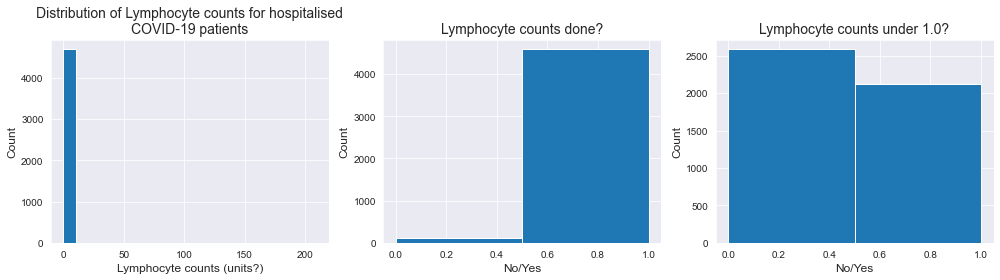

In [133]:
# Plotted distributions of data for Lymphocyte counts

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.Lympho, bins=20)
ax1.set_title("\n".join(wrap('Distribution of Lymphocyte counts for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Lymphocyte counts (units?)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality.LymphoYes, bins=2)
ax2.set_title("\n".join(wrap('Lymphocyte counts done?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['Lympho<1'], bins=2)
ax3.set_title("\n".join(wrap('Lymphocyte counts under 1.0?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

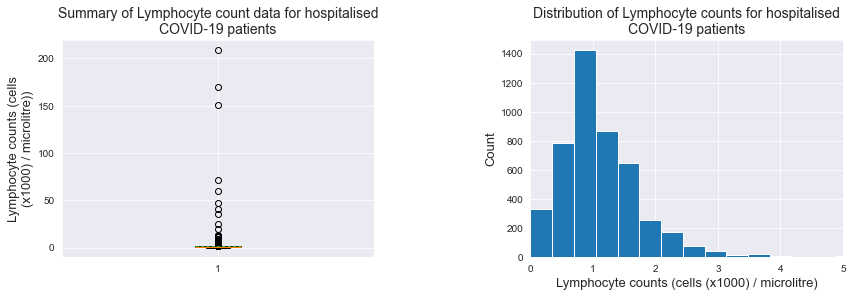

In [134]:
# It looks like there are significant outliers in the 'Lympho' column
  # Checking outliers with box plot
     # No way to tell if some of the largest values are errors or not
    
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,4))
ax1.boxplot("Lympho", whis=True, meanline=True, showmeans=True, showcaps=True, 
                          showfliers=True, data=mortality)

ax1.set_title("\n".join(wrap('Summary of Lymphocyte count data for hospitalised COVID-19 patients',50)), 
              fontsize=14)
ax1.set_ylabel("\n".join(wrap('Lymphocyte counts (cells (x1000) / microlitre))',30)), fontsize=13)

ax2.hist(mortality.Lympho, bins=600)
ax2.set_title("\n".join(wrap('Distribution of Lymphocyte counts for hospitalised COVID-19 patients',50)), fontsize=14)
ax2.set_xlabel("Lymphocyte counts (cells (x1000) / microlitre)", fontsize=13)
ax2.set_ylabel("Count", fontsize=13)
ax2.set_xlim([0, 5])

plt.subplots_adjust(wspace=0.5, hspace=1)
plt.tight_layout
plt.show()

In [135]:
# Do the values in the 'Lympho' column align with what's recorded in the 'LymphoYes' and 'Lympho<1' columns?
  # 179 entries have a value of '0' in the Lympho column; Are these real zeros? 
Lympho = mortality[mortality['Lympho'] == 0]

# 84 entries have a value of '0' in the Lympho column but are scored '1' in the LymphoYes column
Lympho = mortality[(mortality['Lympho'] == 0)&(mortality['LymphoYes'] != 0)]

# The same 84 entries have a value of '0' in the Lympho column and a value of 1 in the 'Lympho<1' column. 
Lympho2 = mortality[(mortality['Lympho'] == 0)&(mortality['Lympho<1'] != 0)]

Lympho2[['Lympho', 'LymphoYes', 'Lympho<1']]

# Will need to drop and recreate these features

,Lympho,LymphoYes,Lympho<1
3848,0.0,1,1
3849,0.0,1,1
3854,0.0,1,1
3860,0.0,1,1
3869,0.0,1,1
...,...,...,...
4686,0.0,1,1
4687,0.0,1,1
4688,0.0,1,1
4691,0.0,1,1


In [136]:
# Recreated the 'LymphoYes' column to align with the 'Lympho' column
mortality.drop('LymphoYes', axis=1, inplace=True)
mortality['LymphoYes'] = np.where(mortality['Lympho'] != 0, 1, 0)

In [137]:
# Calcuated the mode, median and mean values for lymphocyte counts
    
vals,counts = np.unique(mortality['Lympho'], return_counts=True)
index = np.argmax(counts)
print("Mode = ", vals[index])
print("Median = ", np.median(mortality['Lympho']))
print("Mean = ", np.mean(mortality['Lympho']))

# Repaced 0 values with the median value for WBC count
mortality['Lympho'] = mortality['Lympho'].replace(0, np.median(mortality['Lympho']))

Mode =  0.9
Median =  1.0
Mean =  1.3086818085332161


In [138]:
# Recreated the 'Lympho<1' column and created a new feature with abnormally high lymphocyte counts
  # People with a viral infection are expected to have high lymphocyte counts, so picking an upper threshold here is difficult
mortality.drop('Lympho<1', axis=1, inplace=True)
mortality['Lympho<1'] = np.where(mortality['Lympho'] < 1, 1, 0)
mortality['Lympho>2'] = np.where(mortality['Lympho'] > 2 , 1, 0)

mortality[['Lympho', 'LymphoYes', 'Lympho<1', 'Lympho>2']]

,Lympho,LymphoYes,Lympho<1,Lympho>2
0,1.4,1,0,0
1,0.3,1,1,0
2,0.5,1,1,0
3,0.5,1,1,0
4,1.4,1,0,0
...,...,...,...,...
4706,1.0,1,0,0
4707,1.2,1,0,0
4708,1.0,1,0,0
4709,1.8,1,0,0


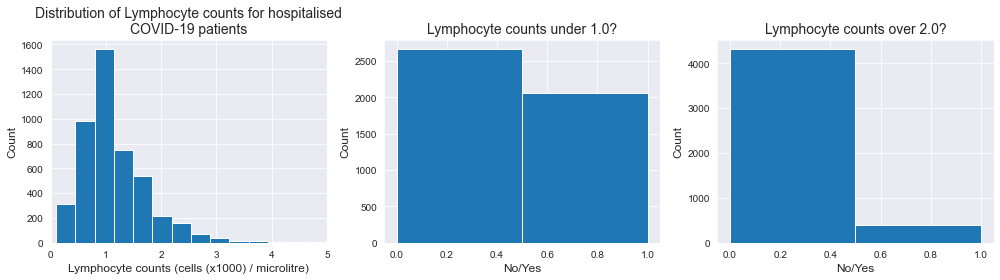

In [139]:
# New plots

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.Lympho, bins=600)
ax1.set_title("\n".join(wrap('Distribution of Lymphocyte counts for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Lymphocyte counts (cells (x1000) / microlitre)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xlim(0, 5)

ax2.hist(mortality['Lympho<1'], bins=2)
ax2.set_title("\n".join(wrap('Lymphocyte counts under 1.0?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['Lympho>2'], bins=2)
ax3.set_title("\n".join(wrap('Lymphocyte counts over 2.0?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

Around 10% of patients had high lymphocyte counts, indicating that they were fighting an infection.  A greater number (around 80%) had slightly lower than expected lymphocycte counts.

### 1.4.15. Interleukin-6 (IL)

Reference: https://erj.ersjournals.com/content/early/2020/08/28/13993003.03006-2020

In a meta-analysis, the reported values for IL-6 in the blood of healthy donors varied between 0 and 43.5 pg/ml. The pooled estimate of IL-6 was 5.186 pg/ml. (https://pubmed.ncbi.nlm.nih.gov/33155686/)

In [140]:
mortality[['IL6']].describe()

,IL6
count,4711.000000
mean,125.035013
std,2238.546108
min,0.000000
25%,0.000000
50%,0.000000
75%,30.000000
max,111040.000000


In [141]:
# Replaced column names to get rid of spaces
mortality.rename(columns={'IL6 > 150':'IL6>150'}, inplace=True)

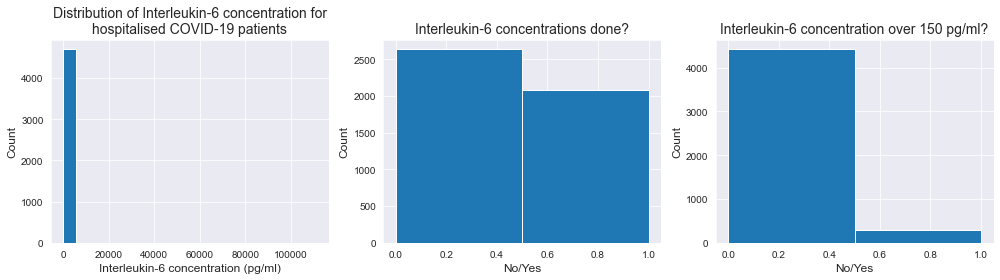

In [142]:
# Plotted distributions of data for IL-6 counts

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.IL6, bins=20)
ax1.set_title("\n".join(wrap('Distribution of Interleukin-6 concentration for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Interleukin-6 concentration (pg/ml)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality.IL6Yes, bins=2)
ax2.set_title("\n".join(wrap('Interleukin-6 concentrations done?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['IL6>150'], bins=2)
ax3.set_title("\n".join(wrap('Interleukin-6 concentration over 150 pg/ml?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

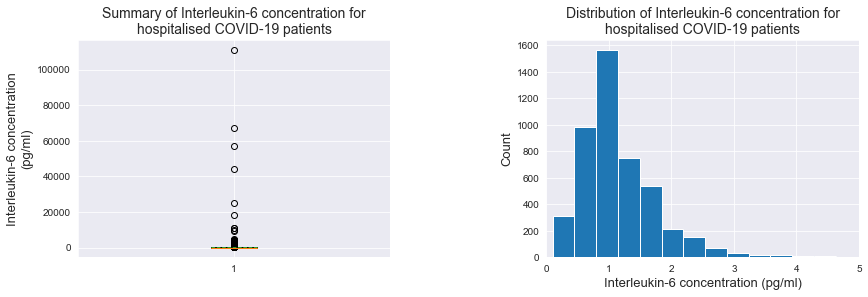

In [143]:
# It looks like there are significant outliers in the 'IL6' column
  # Checking outliers with box plot
     # No way to tell if some of the largest values are errors or not
    
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,4))
ax1.boxplot("IL6", whis=True, meanline=True, showmeans=True, showcaps=True, 
                          showfliers=True, data=mortality)

ax1.set_title("\n".join(wrap('Summary of Interleukin-6 concentration for hospitalised COVID-19 patients',50)), 
              fontsize=14)
ax1.set_ylabel("\n".join(wrap('Interleukin-6 concentration (pg/ml)',30)), fontsize=13)

ax2.hist(mortality.Lympho, bins=600)
ax2.set_title("\n".join(wrap('Distribution of Interleukin-6 concentration for hospitalised COVID-19 patients',50)), fontsize=14)
ax2.set_xlabel("Interleukin-6 concentration (pg/ml)", fontsize=13)
ax2.set_ylabel("Count", fontsize=13)
ax2.set_xlim([0, 5])

plt.subplots_adjust(wspace=0.5, hspace=1)
plt.tight_layout
plt.show()

In [144]:
# Do the values in the 'IL6' column align with what's recorded in the 'IL6Yes' and 'IL6>150' columns?
  # 2636 entries have a value of '0' in the 'IL6' column; Are these real zeros? 
IL6 = mortality[mortality['IL6'] == 0]

# No entries have a value of '0' in the IL6 column but are scored '1' in the IL6Yes column
IL6 = mortality[(mortality['IL6'] == 0)&(mortality['IL6Yes'] != 0)]

# No entries have a value of '0' in the Lympho column and a value of 1 in the 'Lympho<1' column. 
IL6_2 = mortality[(mortality['IL6'] == 0)&(mortality['IL6>150'] != 0)]

IL6_2[['IL6', 'IL6Yes', 'IL6>150']]

# Will need to impute values for the missing entries using the median

,IL6,IL6Yes,IL6>150


In [145]:
# Calcuated the mode, median and mean values for IL-6 concentration
  # Since there are so many 0 values, these need to be excluded from the calculations so as not to scew the median and mode

IL6_3 = mortality[mortality['IL6'] != 0]
vals,counts = np.unique(IL6_3['IL6'], return_counts=True)
index = np.argmax(counts)
print("Mode = ", vals[index])
print("Median = ", np.median(IL6_3['IL6']))
print("Mean = ", np.mean(IL6_3['IL6']))

# Repaced 0 values with the median value for WBC count
mortality['IL6'] = mortality['IL6'].replace(0, np.median(IL6_3['IL6']))

Mode =  3.9999
Median =  38.0
Mean =  283.87467306506034


In [146]:
# Created a new feature with score of IL-6 concentration over 60 pg/ml
# Dropped the 'IL6>150' feature, as the 150 threshold is too high.  
  
mortality.drop('IL6>150', axis=1, inplace=True)
mortality['IL6>60'] = np.where(mortality['IL6'] >= 60, 1, 0)

mortality[['IL6', 'IL6Yes', 'IL6>60']]

,IL6,IL6Yes,IL6>60
0,38.0,0,0
1,38.0,0,0
2,324.1,1,1
3,38.0,0,0
4,39.4,1,0
...,...,...,...
4706,38.0,0,0
4707,38.0,0,0
4708,38.0,0,0
4709,38.0,0,0


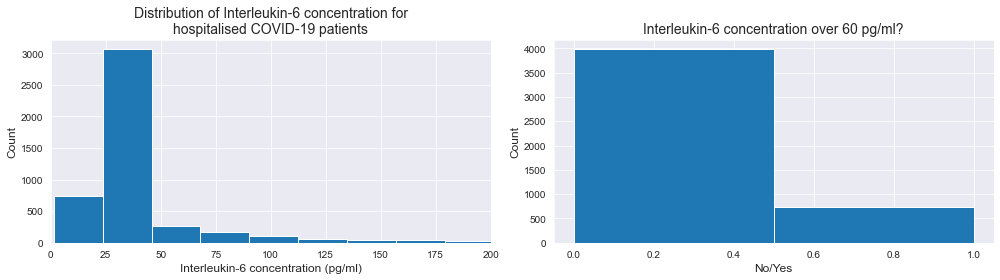

In [147]:
# New plots

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
ax1.hist(mortality.IL6, bins=5000)
ax1.set_title("\n".join(wrap('Distribution of Interleukin-6 concentration for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Interleukin-6 concentration (pg/ml)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xlim(0, 200)

ax2.hist(mortality['IL6>60'], bins=2)
ax2.set_title("\n".join(wrap('Interleukin-6 concentration over 60 pg/ml?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

Around 15% OF patients had elevated IL-6 concentrations, indicating that they were fighting an infection. 

### 1.4.16. Ferritin

Normal value range is: Male: 12 to 300 ng/mL; Female: 12 to 150 ng/mL.

Reference: https://www.mountsinai.org/health-library/tests/ferritin-blood-test#:~:text=Normal%20value%20range%20is%3A,12%20to%20150%20ng%2FmL

In [148]:
mortality[['Ferritin']].describe()

,Ferritin
count,4711.00000
mean,1056.68945
std,3096.44975
min,0.00000
25%,0.00000
50%,445.00000
75%,1180.50000
max,100000.00100


In [149]:
# Replaced column names to get rid of spaces
mortality.rename(columns={'Ferritin > 300':'Ferritin>300'}, inplace=True)

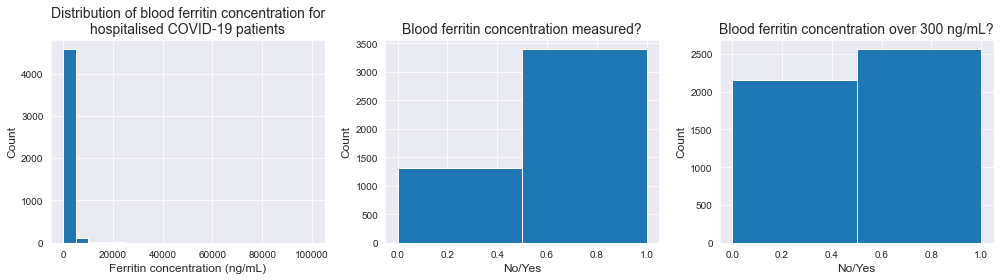

In [150]:
# Plotted distributions of data for ferritin concentration

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.Ferritin, bins=20)
ax1.set_title("\n".join(wrap('Distribution of blood ferritin concentration for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Ferritin concentration (ng/mL)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality.FerritinYes, bins=2)
ax2.set_title("\n".join(wrap('Blood ferritin concentration measured?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['Ferritin>300'], bins=2)
ax3.set_title("\n".join(wrap('Blood ferritin concentration over 300 ng/mL?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

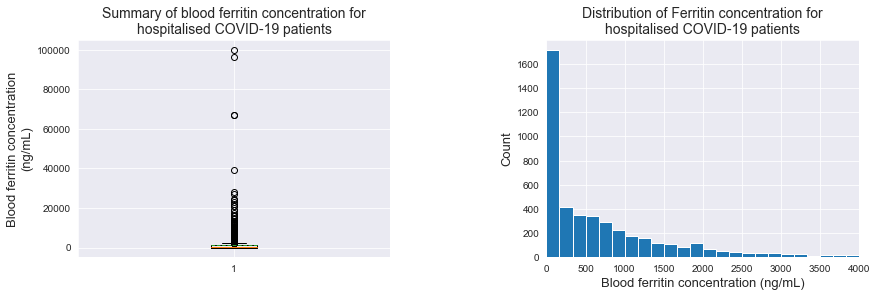

In [151]:
# It looks like there are significant outliers in the 'Ferritin' column
  # Checking outliers with box plot
     # No way to tell if some of the largest values are errors or not
    
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,4))
ax1.boxplot("Ferritin", whis=True, meanline=True, showmeans=True, showcaps=True, 
                          showfliers=True, data=mortality)

ax1.set_title("\n".join(wrap('Summary of blood ferritin concentration for hospitalised COVID-19 patients',50)), 
              fontsize=14)
ax1.set_ylabel("\n".join(wrap('Blood ferritin concentration (ng/mL)',30)), fontsize=13)

ax2.hist(mortality.Ferritin, bins=600)
ax2.set_title("\n".join(wrap('Distribution of Ferritin concentration for hospitalised COVID-19 patients',50)), fontsize=14)
ax2.set_xlabel("Blood ferritin concentration (ng/mL)", fontsize=13)
ax2.set_ylabel("Count", fontsize=13)
ax2.set_xlim([0, 4000])

plt.subplots_adjust(wspace=0.5, hspace=1)
plt.tight_layout
plt.show()

In [152]:
# Do the values in the 'Ferritin' column align with what's recorded in the 'FerritinYes' and 'Ferritin>300' columns?
  # 1407 entries have a value of '0' in the Ferritin column; Are these real zeros? 
Ferritin = mortality[mortality['Ferritin'] == 0]

# 221 entries have a value of '0' in the Ferritin column but are scored '1' in the FerritinYes column
Ferritin = mortality[(mortality['Ferritin'] == 0)&(mortality['FerritinYes'] != 0)]

# No entries have a value of '0' in the Ferritin column and a value of 1 in the 'Ferritin>300' column. 
Ferritin2 = mortality[(mortality['Ferritin'] == 0)&(mortality['Ferritin>300'] != 0)]

Ferritin2[['Ferritin', 'FerritinYes', 'Ferritin>300']]


,Ferritin,FerritinYes,Ferritin>300


In [153]:
# Calcuated the mode, median and mean values for ferritin concentration
  # Since there are so many 0 values, these need to be excluded from the calculations so as not to scew the median and mode

Ferritin3 = mortality[mortality['Ferritin'] != 0]
vals,counts = np.unique(Ferritin3['Ferritin'], return_counts=True)
index = np.argmax(counts)
print("Mode = ", vals[index])
print("Median = ", np.median(Ferritin3['Ferritin']))
print("Mean = ", np.mean(Ferritin3['Ferritin']))

# Repaced 0 values with the median value for WBC count
mortality['Ferritin'] = mortality['Ferritin'].replace(0, np.median(Ferritin3['Ferritin']))

Mode =  816.0
Median =  800.5
Mean =  1506.6779651937047


In [154]:
# Created a new feature with score of concentration over 60 pg/ml
# Dropped the 'Ferritin>300' feature, as the 300 threshold is too high.  
  
mortality.drop('Ferritin>300', axis=1, inplace=True)
mortality['Ferritin>1000'] = np.where(mortality['Ferritin'] >= 1000, 1, 0)

mortality[['Ferritin', 'FerritinYes', 'Ferritin>1000']]

,Ferritin,FerritinYes,Ferritin>1000
0,800.5,0,0
1,885.0,1,0
2,629.0,1,0
3,816.0,1,0
4,1691.0,1,1
...,...,...,...
4706,295.0,1,0
4707,1165.0,1,1
4708,239.0,1,0
4709,1185.0,1,1


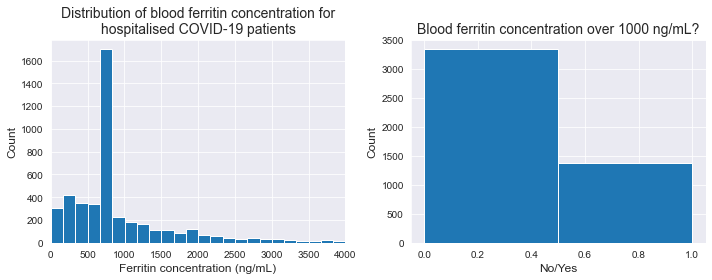

In [155]:
# New plots

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.hist(mortality.Ferritin, bins=600)
ax1.set_title("\n".join(wrap('Distribution of blood ferritin concentration for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Ferritin concentration (ng/mL)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xlim(0,4000)

ax2.hist(mortality['Ferritin>1000'], bins=2)
ax2.set_title("\n".join(wrap('Blood ferritin concentration over 1000 ng/mL?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

Approx. 40% of patients had elevated levels of blood ferritin. 

### 1.4.17. C-Reactive Protein

The level of C-reactive protein (CRP) increases when there's inflammation in the body.
A high-sensitivity C-reactive protein (hs-CRP) test is more sensitive than a standard CRP test. The high-sensitivity test can detect slight increases within the normal range of standard CRP levels. The hs-CRP test can be used to determine the risk of developing coronary artery disease, a condition in which the arteries of the heart are narrowed. 
CRP is measured in milligrams per liter (mg/L). Results for a standard CRP test are usually given as follows: 

    - Normal: Less than 10 mg/L. 
    - High: Equal to or greater than 10 mg/L.
    
Reference: https://www.mayoclinic.org/tests-procedures/c-reactive-protein-test/about/pac-20385228#:~:text=CRP%20is%20measured%20in%20milligrams,greater%20than%2010%20mg%2FL    

In [156]:
# Replaced column names to get rid of spaces
mortality.rename(columns={'CrctProtYes':'CrctProteinYes'}, inplace=True)
mortality.rename(columns={'C-Reactive Prot > 10':'CrctProtein>10'}, inplace=True)

In [157]:
mortality[['CrctProtein']].describe()

,CrctProtein
count,4711.000000
mean,10.314919
std,11.223356
min,0.000000
25%,0.900000
50%,6.500000
75%,16.000000
max,100.000100


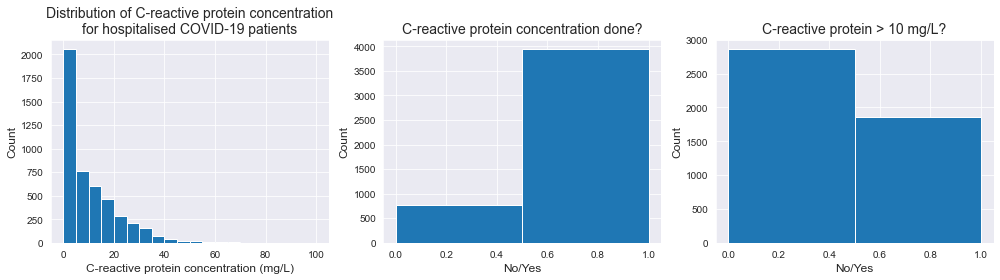

In [158]:
# Plotted distributions of data for C-Reactive Protein

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.CrctProtein, bins=20)
ax1.set_title("\n".join(wrap('Distribution of C-reactive protein concentration for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("C-reactive protein concentration (mg/L)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality.CrctProteinYes, bins=2)
ax2.set_title("\n".join(wrap('C-reactive protein concentration done?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['CrctProtein>10'], bins=2)
ax3.set_title("\n".join(wrap('C-reactive protein > 10 mg/L?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [159]:
# Do the values in the 'CrctProtein' column align with what's recorded in the 'CrctProteinYes' and 'CrctProtein>10' columns?
  # 876 entries have a value of '0' in the CrctProtein column; Are these real zeros? 
crct = mortality[mortality['CrctProtein'] == 0]

# No entries have a value of '0' in the CrctProtein column but are scored '1' in the CrctProteinYes column
crct = mortality[(mortality['CrctProtein'] == 0)&(mortality['CrctProtein'] != 0)]

# No entries have a value of '0' in the CrctProtein column and a value of 1 in the 'CrctProtein>10' column. 
crct2 = mortality[(mortality['CrctProtein'] == 0)&(mortality['CrctProtein>10'] != 0)]

crct2[['CrctProtein', 'CrctProteinYes', 'CrctProtein>10']]


,CrctProtein,CrctProteinYes,CrctProtein>10


In [160]:
# Calcuated the mode, median and mean values for C-reactive protein concentration
  # Since there are so many 0 values, these need to be excluded from the calculations so as not to scew the median and mode

crct3 = mortality[mortality['CrctProtein'] != 0]
vals,counts = np.unique(crct3['CrctProtein'], return_counts=True)
index = np.argmax(counts)
print("Mode = ", vals[index])
print("Median = ", np.median(crct3['CrctProtein']))
print("Mean = ", np.mean(crct3['CrctProtein']))

#Repaced 0 values with the median value for C-reactive protein concentration
mortality['CrctProtein'] = mortality['CrctProtein'].replace(0, np.median(crct3['CrctProtein']))

Mode =  0.4999
Median =  9.9
Mean =  12.67107744458929


In [161]:
# Created a new feature for C-reactive protein concentration over 20 mg/L 
  
mortality['CrctProtein>20'] = np.where(mortality['CrctProtein'] >= 20, 1, 0)

mortality[['CrctProtein', 'CrctProteinYes', 'CrctProtein>10', 'CrctProtein>20']]

,CrctProtein,CrctProteinYes,CrctProtein>10,CrctProtein>20
0,0.4999,1,0,0
1,14.9000,1,1,0
2,33.9000,1,1,1
3,18.4000,1,1,0
4,11.6000,1,1,0
...,...,...,...,...
4706,1.8000,1,0,0
4707,3.1000,1,0,0
4708,0.4999,1,0,0
4709,8.6000,1,0,0


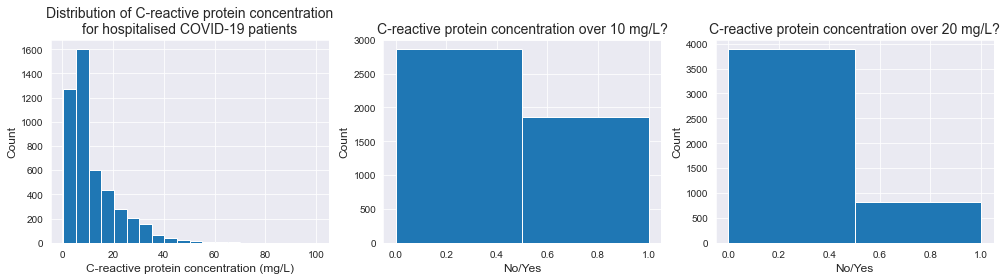

In [162]:
# New plots for C-Reactive Protein

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.CrctProtein, bins=20)
ax1.set_title("\n".join(wrap('Distribution of C-reactive protein concentration for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("C-reactive protein concentration (mg/L)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality['CrctProtein>10'], bins=2)
ax2.set_title("\n".join(wrap('C-reactive protein concentration over 10 mg/L?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['CrctProtein>20'], bins=2)
ax3.set_title("\n".join(wrap('C-reactive protein concentration over 20 mg/L?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

Around 20% of patients had elevated levels of C-reactive protein, indicating inflammation.

### 1.4.18. Procalcitonin

Reference: https://www.gloshospitals.nhs.uk/our-services/services-we-offer/pathology/tests-and-investigations/procalcitonin-pct/#:~:text=PCT%20is%20normally%20less%20than,%2FL)%20in%20healthy%20individuals.

Procalcitonin (PCT) is the precursor of the hormone calcitonin, which in normal metabolic conditions is mainly produced by the C‐cells of the thyroid medulla and to a lesser extent by other neuroendocrine cells. The blood of healthy individuals contains only very low levels of PCT.

Following pro-inflammatory stimulation (particularly systemic bacterial infection), PCT is produced by numerous cell types. PCT affects the immune response by modulating the induction of pro-inflammatory cytokines. It also acts as a chemokine, influencing the migration of monocytes and parenchymal cells to the site of inflammation. PCT plays a role in vascular contraction through inhibiting or activating the induction of inducible NO‐synthase.

Increased PCT levels are therefore found in patients suffering from bacterial sepsis, especially severe sepsis and septic shock. PCT has been proposed as a tool to guide decisions relating to antibiotic requirements. As a biomarker of infection it has many ideal properties including a rapid rise in response to stimulation and a fall in response to control of the infection.


PCT is normally less than 0.05 ng/mL (equivalent to less than 0.05 ug/L) in healthy individuals.

Clinical cut-off:

    - <0.50ng/mL represents a low risk of severe sepsis and/or septic shock
    - >2.00ng/mL represents a high risk of severe sepsis and/or septic shock

In [163]:
# Replaced column names to get rid of spaces
mortality.rename(columns={'Procalciton > 0.1':'Procalcitonin>0.1'}, inplace=True)
mortality.rename(columns={'ProCalCYes':'ProcalcitoninYes'}, inplace=True)

In [164]:
mortality[['Procalcitonin']].describe()

,Procalcitonin
count,4711.000000
mean,1.585601
std,6.262625
min,0.000000
25%,0.000000
50%,0.100000
75%,0.400000
max,50.000100


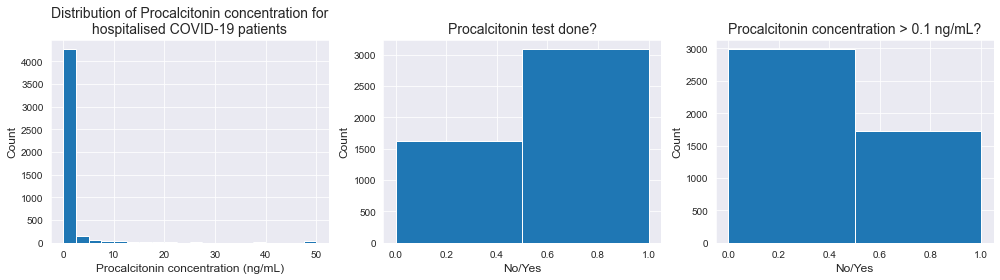

In [165]:
# Plotted distributions of data for Procalcitonin concentration

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.Procalcitonin, bins=20)
ax1.set_title("\n".join(wrap('Distribution of Procalcitonin concentration for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Procalcitonin concentration (ng/mL)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality.ProcalcitoninYes, bins=2)
ax2.set_title("\n".join(wrap('Procalcitonin test done?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['Procalcitonin>0.1'], bins=2)
ax3.set_title("\n".join(wrap('Procalcitonin concentration > 0.1 ng/mL?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [166]:
# Do the values in the 'Procalcitonin' column align with what's recorded in the 'ProcalcitoninYes' and 'Procalcitonin>0.1' columns?
  # 1714 entries have a value of '0' in the Procalcitonin column; Are these real zeros? 
pct = mortality[mortality['Procalcitonin'] == 0]

# No entries have a value of '0' in the Procalcitonin column but are scored '1' in the ProcalcitoninYes column;
   # so the zeros do indicate tests not done
pct = mortality[(mortality['Procalcitonin'] == 0)&(mortality['Procalcitonin'] != 0)]

# No entries have a value of '0' in the Procalcitonin column and a value of 1 in the 'Procalcitonin>0.1' column. 
pct2 = mortality[(mortality['Procalcitonin'] == 0)&(mortality['Procalcitonin>0.1'] != 0)]

pct2[['Procalcitonin', 'ProcalcitoninYes', 'Procalcitonin>0.1']]


,Procalcitonin,ProcalcitoninYes,Procalcitonin>0.1


In [167]:
# Calcuated the mode, median and mean values for Procalcitonin concentration
  # Since there are so many 0 values, these need to be excluded from the calculations so as not to scew the median and mode

pct3 = mortality[mortality['Procalcitonin'] != 0]
vals,counts = np.unique(pct3['Procalcitonin'], return_counts=True)
index = np.argmax(counts)
print("Mode = ", vals[index])
print("Median = ", np.median(pct3['Procalcitonin']))
print("Mean = ", np.mean(pct3['Procalcitonin']))

#Repaced 0 values with the MODE value for Procalcitonin concentration in this case, since Procalcitonin>0.1 is a feature
mortality['Procalcitonin'] = mortality['Procalcitonin'].replace(0, vals[index])

Mode =  0.1
Median =  0.2
Mean =  2.492414914914958


In [168]:
# Created a new feature for Procalcitonin concentration over 2.0 mg/L 
  
mortality['Procalcitonin>2'] = np.where(mortality['Procalcitonin'] >= 2, 1, 0)

mortality[['Procalcitonin', 'ProcalcitoninYes', 'Procalcitonin>0.1', 'Procalcitonin>2']]

,Procalcitonin,ProcalcitoninYes,Procalcitonin>0.1,Procalcitonin>2
0,0.1000,0,0,0
1,0.6000,1,1,0
2,1.2000,1,1,0
3,7.3000,1,1,1
4,0.1000,0,0,0
...,...,...,...,...
4706,0.0999,1,0,0
4707,0.0999,1,0,0
4708,0.1000,1,0,0
4709,0.1000,1,0,0


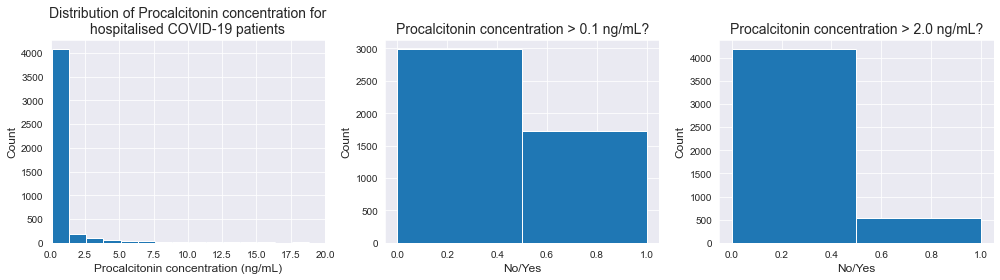

In [169]:
# New plots for Procalcitonin concentration

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.Procalcitonin, bins=40)
ax1.set_title("\n".join(wrap('Distribution of Procalcitonin concentration for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Procalcitonin concentration (ng/mL)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xlim(0,20)

ax2.hist(mortality['Procalcitonin>0.1'], bins=2)
ax2.set_title("\n".join(wrap('Procalcitonin concentration > 0.1 ng/mL?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['Procalcitonin>2'], bins=2)
ax3.set_title("\n".join(wrap('Procalcitonin concentration > 2.0 ng/mL?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

Around 12% of patients had very high levels of procalcitonin, indicating a high risk of septic shock.

### 1.4.19. Troponin

The normal range for troponin is between 0 and 0.04 ng/mL but for high-sensitivity cardiac troponin (hs-cTn) normal values are below 14ng/L.

Other types of heart injury may cause a rise in troponin levels. These include:

    - Atrial fibrillation
    - Heart failure
    - Myocarditis
    - Damage to the heart from anthracycline medicines (used for cancer treatment).

Conditions in other parts of the body may cause troponin levels to rise. These include:

    - Blood clot in the lungs (pulmonary embolism)
    - Chronic kidney disease
    - Chronic obstructive pulmonary disease (COPD)

In [170]:
# Replaced column names to get rid of spaces
mortality.rename(columns={'Troponin > 0.1':'Troponin>0.1'}, inplace=True)
mortality.rename(columns={'TropYes':'TroponinYes'}, inplace=True)

In [171]:
mortality[['Troponin']].describe()

,Troponin
count,4711.000000
mean,0.051558
std,0.268160
min,0.000000
25%,0.010000
50%,0.010000
75%,0.020000
max,9.560000


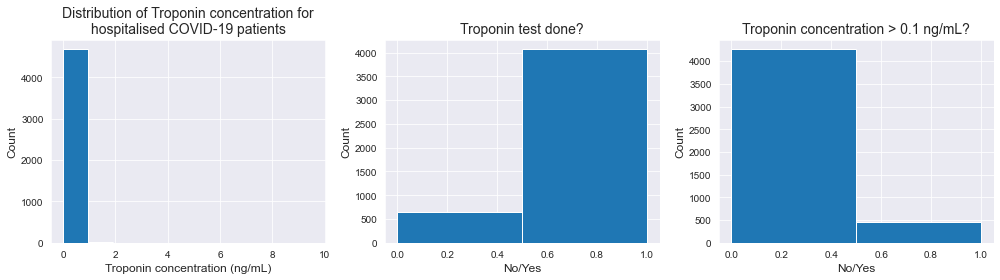

In [172]:
# Plotted distributions of data for Troponin concentration

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))
ax1.hist(mortality.Troponin, bins=10)
ax1.set_title("\n".join(wrap('Distribution of Troponin concentration for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Troponin concentration (ng/mL)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2.hist(mortality.TroponinYes, bins=2)
ax2.set_title("\n".join(wrap('Troponin test done?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

ax3.hist(mortality['Troponin>0.1'], bins=2)
ax3.set_title("\n".join(wrap('Troponin concentration > 0.1 ng/mL?',50)), fontsize=14)
ax3.set_xlabel("No/Yes", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [173]:
# Do the values in the 'Troponin' column align with what's recorded in the 'TroponinYes' and 'Troponin>0.1' columns?
  # 641 entries have a value of '0' in the Troponin column; Are these real zeros? 
trp = mortality[mortality['Troponin'] == 0]

# No entries have a value of '0' in the Troponin column but are scored '1' in the TroponinYes column;
   # so the zeros do indicate tests not done
trp = mortality[(mortality['Troponin'] == 0)&(mortality['Troponin'] != 0)]

# No entries have a value of '0' in the Troponin column and a value of 1 in the 'Troponin>0.1' column. 
trp2 = mortality[(mortality['Troponin'] == 0)&(mortality['Troponin>0.1'] != 0)]

trp2[['Troponin', 'TroponinYes', 'Troponin>0.1']]

,Troponin,TroponinYes,Troponin>0.1


In [174]:
# Calcuated the mode, median and mean values for Troponin concentration
  # Since there are so many 0 values, these need to be excluded from the calculations so as not to scew the median and mode

trp3 = mortality[mortality['Troponin'] != 0]
vals,counts = np.unique(trp3['Troponin'], return_counts=True)
index = np.argmax(counts)
print("Mode = ", vals[index])
print("Median = ", np.median(trp3['Troponin']))
print("Mean = ", np.mean(trp3['Troponin']))

#Repaced 0 values with the MODE/MEDIAN value for Troponin concentration
mortality['Troponin'] = mortality['Troponin'].replace(0, vals[index])

Mode =  0.01
Median =  0.01
Mean =  0.05967813267813024


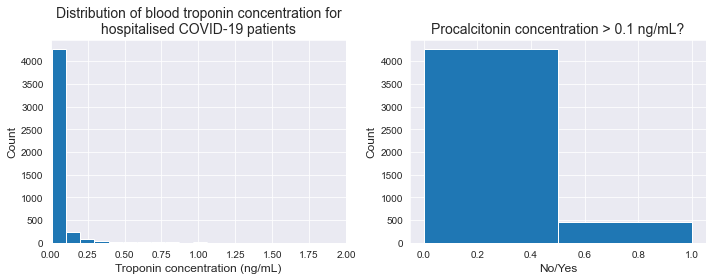

In [175]:
# New plots for Troponin concentration

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.hist(mortality.Troponin, bins=100)
ax1.set_title("\n".join(wrap('Distribution of blood troponin concentration for hospitalised COVID-19 patients',50)), fontsize=14)
ax1.set_xlabel("Troponin concentration (ng/mL)", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xlim(0,2)

ax2.hist(mortality['Troponin>0.1'], bins=2)
ax2.set_title("\n".join(wrap('Procalcitonin concentration > 0.1 ng/mL?',50)), fontsize=14)
ax2.set_xlabel("No/Yes", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

Around 10% of patients had elevated levels of procalcitonin, indicating potential heard damage or blood clots in the lungs.

## 1.5. Feature Selection

For efficient modelling, a subset of features need to be selected.  Feature selection is described in notebooks 2 and 3, but here we take a cursory look at high the features correlate with the target variables 'death' and 'severity'.

The features that correlate most strongly with death are 'severity' (correlation coefficient (cc) = 0.43), 'mean arterial pressure over 70 mm/Hg' (cc 0.39), and 'age' (cc 0.29).

A larger number of features give high correlations with 'severity', suggesting that 'severity' might be easier to predict that feature from the features compiled in this dataset. the highest correlated features are Age (cc 0.63), CrtnScore (cc 0.53), BUN (cc 0.50), BUN>30 (cc 0.48) and DDimer>3 (cc 0.47).

In [582]:
# Shortlisted the top 30 features for predicting 'Death' by correlation coefficient
corr = mortality.corrwith(mortality.Death, axis=0, method='pearson')
corr = corr.sort_values(ascending=False)
corr_death_30 = corr[(corr < 0.9999)&((corr > 0.2)|(corr < -0.2))]
corr_death_30 = pd.DataFrame(corr_death_30, columns=['corr. coefficient'])
corr_death_30.style.background_gradient(cmap='GnBu')

,corr. coefficient
Severity,0.431134
MAP < 70,0.392984
Age,0.291806
AgeScore,0.286053
CrtnScore,0.226512
CrctProtein,0.215827
Procalciton > 0.1,0.211338
BUN > 30,0.205231
MAP,-0.252574


In [583]:
# Shortlisted the top 30 features for predicting 'Severity' by correlation coefficient
corr2 = mortality.corrwith(mortality.Severity, axis=0, method='pearson')
corr2 = corr2.sort_values(ascending=False)
corr_severity_30 = corr2[(corr2 < 0.9999)&((corr2 > 0.41)|(corr2 < -0.41))]
corr_severity_30 = pd.DataFrame(corr_severity_30, columns=['corr. coefficient'])
corr_severity_30.style.background_gradient(cmap='GnBu')

,corr. coefficient
AgeScore,0.631260
Age,0.612887
CrtnScore,0.561137
BUN > 30,0.478175
D-Dimer > 3,0.465335
INR > 1.2,0.465335
BUN,0.463669
C-Reactive Prot > 10,0.461412
CrctProtein,0.431441
Death,0.431134


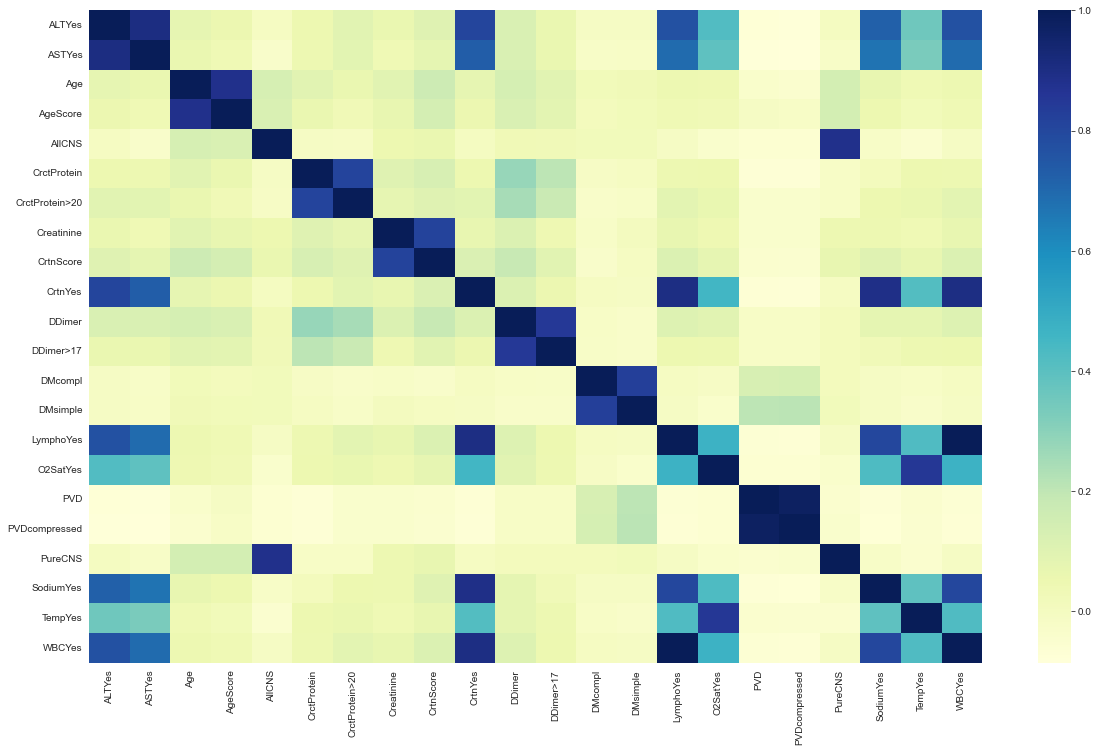

In [178]:
# Looking for highly correlated variables to check for colinearity within the dataset

from itertools import combinations
from numpy.random import randn
# code from here: https://datascience.stackexchange.com/questions/82226/how-to-visualise-a-large-correlation-matrix

def absHighPass(df, absThresh):
    passed = set()
    for (r,c) in combinations(df.columns, 2):
        if (abs(df.loc[r,c]) >= absThresh):
            passed.add(r)
            passed.add(c)
    passed = sorted(passed)
    return df.loc[passed,passed]

corrDf = mortality.corr()

#heatmap(corrDf,cmap="YlGnBu")
fig, ax = plt.subplots(figsize=(20, 12))
ax = sns.heatmap(absHighPass(corrDf,0.8),cmap="YlGnBu", annot=False)
plt.show()

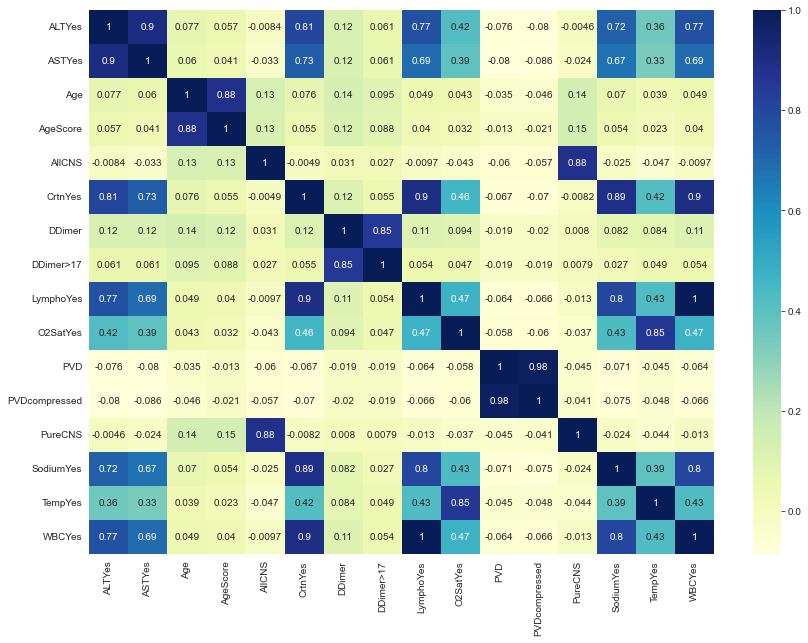

In [179]:
# Plotted contrasts with correlation coefficients > 0.85
fig, ax = plt.subplots(figsize=(14, 10))
ax = sns.heatmap(absHighPass(corrDf,0.85),cmap="YlGnBu", annot=True)
plt.show()

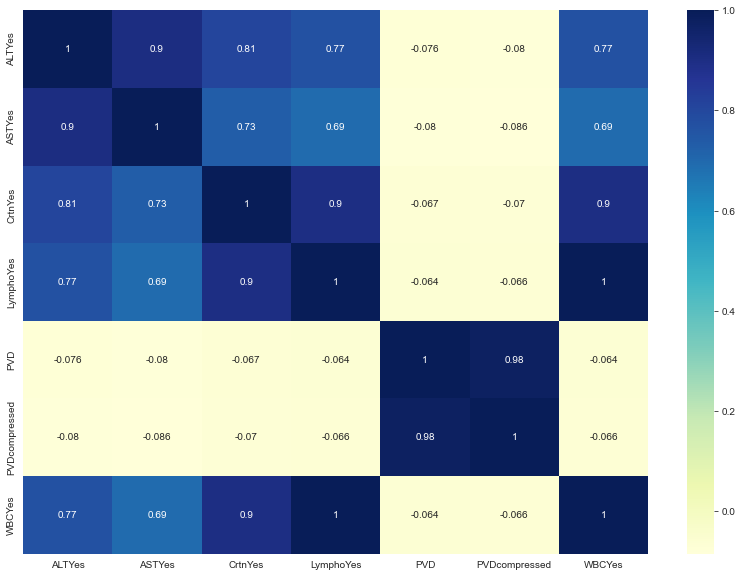

In [180]:
# The most highly correlated features are PVD and PVDcompressed, with a correlation coefficient
  # of 0.98.  Ideally these features should not be used together in the models
fig, ax = plt.subplots(figsize=(14, 10))
ax = sns.heatmap(absHighPass(corrDf,0.9),cmap="YlGnBu", annot=True)
plt.show()

In [181]:
import sweetviz as sv
import pandas as pd

In [182]:
my_report = sv.analyze(mortality)
my_report.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [183]:
# Exported cleaned data to .csv for safe-keeping and to use in Notebooks 2 and 3
mortality.to_csv('mortality_clean.csv')

In [185]:
# Reimported to check
mortality = pd.read_csv(r'/Users/gaylecferguson/Data/Capstone_Project/mortality_clean.csv',header=0)
print(mortality.shape)
mortality.head()

(4711, 98)


,Unnamed: 0,Derivation cohort,LOS_Y,LOS,Death,AgeGroup,Severity,Black,White,Asian,...,ALT>50,WBCYes,WBC<4.3>10.8,LymphoYes,Lympho<1,Lympho>2,IL6>60,Ferritin>1000,CrctProtein>20,Procalcitonin>2
0,0,1,1,1,0,>80,3,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,1,1,1,2,1,>60,7,0,1,0,...,0,1,1,1,1,0,0,0,0,0
2,2,1,1,2,1,>80,7,0,1,0,...,0,1,0,1,1,0,1,0,1,0
3,3,1,1,15,0,>70,9,1,0,0,...,0,1,1,1,1,0,0,0,0,1
4,4,1,1,9,0,>70,7,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [186]:
#mortality.columns

In [191]:
# Dropped columns that will not be used for predicting 'Death' or 'Severity'
mortality.drop(['Unnamed: 0', 'Derivation cohort', 'LOS_Y', 'MAPYes','PltsYes','CrtnYes','GlucoseYes','IL6Yes','FerritinYes',
               'CrctProteinYes','ProcalcitoninYes','TroponinYes','BUNYes','O2SatYes','TempYes','DDimerYes','INRYes',
               'SodiumYes','ASTYes','ALTYes','WBCYes','LymphoYes'], axis=1, inplace=True)
print(mortality.shape)
mortality.columns

(4711, 76)


Index(['LOS', 'Death', 'AgeGroup', 'Severity', 'Black', 'White', 'Asian',
       'Latino', 'MI', 'PVD', 'CHF', 'CVD', 'DEMENT', 'COPD', 'DMcompl',
       'DMsimple', 'RenalDis', 'AllCNS', 'PureCNS', 'Stroke', 'Seizure',
       'OldSyncope', 'OldOtherNeuro', 'OtherBrnLsn', 'Age', 'AgeScore',
       'O2Sat', 'Temp', 'Temp>38', 'MAP', 'MAP<70', 'DDimer', 'DDimer>3',
       'PltsScore', 'INR', 'BUN', 'Creatinine', 'CrtnScore', 'Sodium',
       'Glucose', 'AST', 'ALT', 'WBC', 'Lympho', 'IL6', 'Ferritin',
       'CrctProtein', 'CrctProtein>10', 'Procalcitonin', 'Procalcitonin>0.1',
       'Troponin', 'Troponin>0.1', 'PVDcompressed', 'BUN>30', 'BUN>100',
       'O2Sat<94', 'O2Sat<90', 'Temp<=36', 'Temp>39', 'DDimer>17', 'INR>1.2',
       'Sodium130<>145', 'Sodium>155', 'Glucose<60>140', 'Glucose>200',
       'AST>100', 'AST>50', 'ALT>100', 'ALT>50', 'WBC<4.3>10.8', 'Lympho<1',
       'Lympho>2', 'IL6>60', 'Ferritin>1000', 'CrctProtein>20',
       'Procalcitonin>2'],
      dtype='object')

In [188]:
mortality.head(5)

,LOS,Death,AgeGroup,Severity,Black,White,Asian,Latino,MI,PVD,...,AST>50,ALT>100,ALT>50,WBC<4.3>10.8,Lympho<1,Lympho>2,IL6>60,Ferritin>1000,CrctProtein>20,Procalcitonin>2
0,1,0,>80,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,>60,7,0,1,0,0,0,1,...,1,0,0,1,1,0,0,0,0,0
2,2,1,>80,7,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
3,15,0,>70,9,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
4,9,0,>70,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [192]:
# Exported cleaned data to .csv
mortality.to_csv('mortality_clean.csv')